## Урок 2

In [1848]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

### Задача 1

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска (GD) и стохастического градиентного спуска (SGD). Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [1849]:
from sklearn import datasets

X, y, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=4, 
                                      n_informative=3, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)
coef

array([97.246139  ,  8.54030302, 48.50179875,  0.        ])

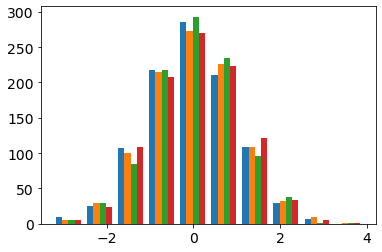

In [1850]:
plt.hist(X);

In [1851]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [1852]:
df = pd.DataFrame(columns=['name', 'iterations', 'alpha', 'lambda_', 'iter', 'w1', 'w2', 'w3', 'w4', 'MSE'])
name = 'Base'
lambda_= 0
iterations = 0
alpha = 0
w1, w2, w3, w4 = coef
err = 0
df.loc[len(df)] = [name, iterations, alpha, lambda_, i, w1, w2, w3, w4, err]
# Запускать каждый раз, когда нужно полностью очистить базу значений.

### Градиентный спуск

In [1853]:
# Метод градиентного спуска
def eval_GD(X, y, iterations, alpha):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
        if i % 100 == 0:
            print(i, w, err)
            w1, w2, w3, w4 = w
            name = 'GD'
            lambda_= 0
            df.loc[len(df)] = [name, iterations, alpha, lambda_, i, w1, w2, w3, w4, err]
    return w, df

In [1854]:
eval_GD(X, y, 1300, 1e-2)

100 [83.84068931  6.55300704 40.2738908   0.62893984] 268.2363657214654
200 [ 9.52050166e+01  8.03612475e+00  4.72209224e+01 -1.68356392e-03] 29.25163742635347
300 [96.7801553   8.30822942 48.40142546 -0.14552695] 24.007635351667183
400 [97.00182421  8.35400391 48.59804464 -0.17161955] 23.88839227852765
500 [97.03345478  8.36133802 48.63035345 -0.17588457] 23.88561266781738
600 [97.03802445  8.36247796 48.63561284 -0.17653999] 23.885546749646487
700 [97.03869186  8.36265163 48.63646327 -0.17663647] 23.885545167381064
800 [97.03879027  8.36267772 48.63660011 -0.17665019] 23.88554512906834
900 [97.0388049   8.36268161 48.63662205 -0.17665208] 23.88554512813461
1000 [97.03880709  8.36268218 48.63662556 -0.17665234] 23.88554512811174
1100 [97.03880742  8.36268226 48.63662612 -0.17665237] 23.885545128111183
1200 [97.03880747  8.36268228 48.63662621 -0.17665237] 23.88554512811117
1300 [97.03880748  8.36268228 48.63662622 -0.17665237] 23.885545128111165


(array([97.03880748,  8.36268228, 48.63662622, -0.17665237]),
     name iterations      alpha lambda_  \
 0   Base          0          0       0   
 1     GD       1300 0.01000000       0   
 2     GD       1300 0.01000000       0   
 3     GD       1300 0.01000000       0   
 4     GD       1300 0.01000000       0   
 5     GD       1300 0.01000000       0   
 6     GD       1300 0.01000000       0   
 7     GD       1300 0.01000000       0   
 8     GD       1300 0.01000000       0   
 9     GD       1300 0.01000000       0   
 10    GD       1300 0.01000000       0   
 11    GD       1300 0.01000000       0   
 12    GD       1300 0.01000000       0   
 13    GD       1300 0.01000000       0   
 
                                              iter          w1         w2  \
 0   AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                             100 83.84068931 6.55300704   
 2                                             200 95.205016

In [1856]:
eval_GD(X, y, 12800, 1e-3)

100 [17.83506518  0.98064565  8.21710694  1.58505698] 7695.374408387717
200 [32.04888255  1.97530777 14.60699752  1.56517811] 5242.102063941857
300 [43.70317895  2.85357842 19.99824688  1.49172099] 3575.462535866417
400 [53.26044254  3.62463381 24.54459944  1.38530784] 2442.5235075475566
500 [61.09930448  4.29821618 28.3766056   1.26074216] 1671.9140398343652
600 [67.52979593  4.8841133  31.6050222   1.12846015] 1147.446066088548
700 [72.80581971  5.39181089 34.3237353   0.99564336] 790.2931187507301
800 [77.13534689  5.83027172 36.61226786  0.86706849] 546.9417060723508
900 [80.6887546   6.20780645 38.53792766  0.74575365] 381.03972750735204
1000 [83.60564516  6.53200997 40.15764442  0.63344731] 267.8776303383352
1100 [86.00042403  6.8097433  41.51953867  0.53099629] 190.64945051138662
1200 [87.9668633   7.04714652 42.66426001  0.43862065] 137.91800528158277
1300 [89.58183579  7.24967181 43.62612717  0.35611758] 101.89530085520077
1400 [90.90837108  7.42212885 44.43409816  0.2830111 ]

12200 [97.03880747  8.36268228 48.63662621 -0.17665237] 23.885545128111172
12300 [97.03880747  8.36268228 48.63662621 -0.17665237] 23.88554512811117
12400 [97.03880747  8.36268228 48.63662621 -0.17665237] 23.885545128111175
12500 [97.03880747  8.36268228 48.63662621 -0.17665237] 23.885545128111175
12600 [97.03880747  8.36268228 48.63662622 -0.17665237] 23.88554512811117
12700 [97.03880748  8.36268228 48.63662622 -0.17665237] 23.885545128111175
12800 [97.03880748  8.36268228 48.63662622 -0.17665237] 23.88554512811116


(array([97.03880748,  8.36268228, 48.63662622, -0.17665237]),
      name iterations      alpha lambda_  \
 0    Base          0          0       0   
 1      GD       1300 0.01000000       0   
 2      GD       1300 0.01000000       0   
 3      GD       1300 0.01000000       0   
 4      GD       1300 0.01000000       0   
 ..    ...        ...        ...     ...   
 137    GD      12800 0.00100000       0   
 138    GD      12800 0.00100000       0   
 139    GD      12800 0.00100000       0   
 140    GD      12800 0.00100000       0   
 141    GD      12800 0.00100000       0   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015530 8.30822942   
 4                

<table>
<tr><th>Модель</th><th>Число итераций</th><th>Alpha</th><th>Lambda</th><th>MSE</th><th>Вес 1</th><th>Вес 2</th><th>Вес 3</th><th>Вес 4</th></tr>
    
<tr><td>Исходные данные</td><td>-</td><td>-</td><td>-</td><td>-</td><td>97.246139</td><td>8.54030302</td><td>48.50179875</td><td>0.</td></tr>
    
<tr><td>GD (1e-3)</td><td>12800</td><td>1e-3</td><td>-</td><td>23.88554512811116</td><td>97.03880748</td><td>8.36268228</td><td>48.63662622</td><td>-0.17665237</td></tr>

<tr><td>GD (1e-2)</td><td>1300</td><td>1e-2</td><td>-</td><td>23.885545128111165</td><td>97.03880748</td><td>8.36268228</td><td>48.63662622</td><td>-0.17665237</td></tr>
</table>

In [1858]:
# Рисует столбчатую диаграмму. data = [x, значение условия выборки], var1 - поле, которое отбираем, 
# var2 - поле, по которому отбираем, color - цвет столбца, name - признак всей выборки.

def draw_bar(row, col, cols, data, var1, var2, name, color, width, func):
    if func == 'min':
        if cols == 0:
            for i in data:
                ax[col].bar(i[0], min(df[var1].loc[(df[var2]==i[1]) & (df['name']== name)]), color = color, width = width)
        else:
            for i in data:
                ax[row][col].bar(i[0], min(df[var1].loc[(df[var2]==i[1]) & (df['name']==name)]), color = color, width = width)
    else:
        if cols == 0:
            for i in data:
                ax[col].bar(i[0], max(df[var1].loc[(df[var2]==i[1]) & (df['name']== name)]), color = color, width = width)
        else:
            for i in data:
                ax[row][col].bar(i[0], max(df[var1].loc[(df[var2]==i[1]) & (df['name']==name)]), color = color, width = width)
    return

In [1859]:
# Подписывает данные на диаграмме в фигуре. Row, col - положение диаграммы в фигуре. Если диаграммы расположены в 1 строку, 
# cols = 0. Data = [x, y, надпись] Alignment - положение надписи

def set_title(row, col, cols, data, alignment):
    if cols == 0:
        for i in data:
            ax[col].text(i[0], i[1], i[2], horizontalalignment = alignment)
    else:
        for i in data:
            ax[row][col].text(i[0], i[1], i[2], horizontalalignment = alignment)
        return

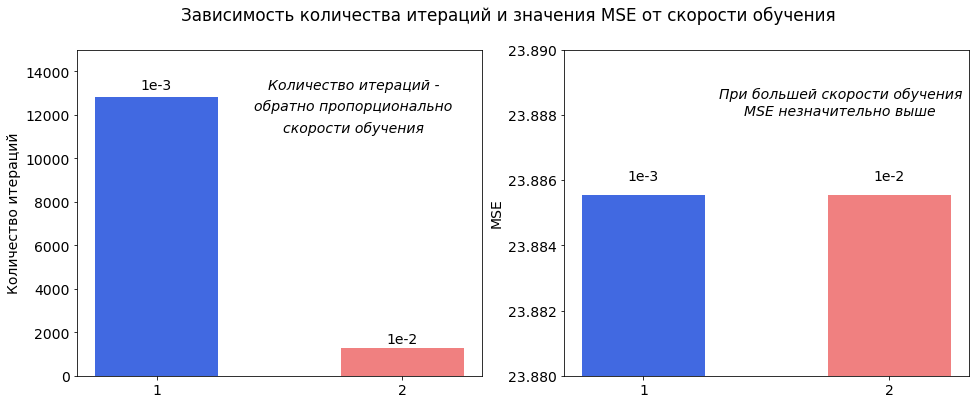

In [1860]:
fig , ax = plt.subplots(ncols = 2, figsize=(16, 6))

#Количество итераций - скорость обучения
draw_bar(0, 0, 0, [['1', 1e-3]], 'iter', 'alpha', 'GD', 'royalblue', 0.5, 'max')
draw_bar(0, 0, 0, [['2', 1e-2]], 'iter', 'alpha', 'GD', 'lightcoral', 0.5, 'max')
set_title(0, 0, 0, [['1', 13200, '1e-3'], ['2', 1500, '1e-2']], 'center')
ax[0].set_ylabel('Количество итераций')
ax[0].set_ylim([0, 15000])
ax[0].text(0.8, 13200, 'Количество итераций -', horizontalalignment = 'center', style = 'italic')
ax[0].text(0.8, 12200, 'обратно пропорционально', horizontalalignment = 'center', style = 'italic')
ax[0].text(0.8, 11200, 'скорости обучения', horizontalalignment = 'center', style = 'italic')

#MSE - скорость обучения
draw_bar(0, 1, 0, [['1', 1e-3]], 'MSE', 'alpha', 'GD', 'royalblue', 0.5, 'min')
draw_bar(0, 1, 0, [['2', 1e-2]], 'MSE', 'alpha', 'GD', 'lightcoral', 0.5, 'min')
set_title(0, 1, 0, [['1', 23.886, '1e-3'], ['2', 23.886, '1e-2']], 'center')
ax[1].set_ylabel('MSE')
ax[1].set_ylim([23.88, 23.89])
ax[1].text(0.8, 23.8885, 'При большей скорости обучения', horizontalalignment = 'center', style = 'italic')
ax[1].text(0.8, 23.888, 'MSE незначительно выше', horizontalalignment = 'center', style = 'italic')

fig.suptitle('Зависимость количества итераций и значения MSE от скорости обучения')
plt.show()

### Стохастический градиентный спуск

In [1861]:
# mini-batch GD & SGD
def eval_SGD(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp))
        if i % 100 == 0:
            print(i, w, err)
            w1, w2, w3, w4 = w
            name = 'SGD'
            lambda_= 0
            df.loc[len(df)] = [name, iterations, alpha, lambda_, i, w1, w2, w3, w4, err]
    return w, df

In [1862]:
eval_SGD(X, y, 400, 1, 1e-2)

100 [83.57993278  6.52865174 40.14607917  0.6317218 ] 16.997417709936368
200 [9.51321691e+01 8.02505239e+00 4.71758767e+01 1.31533935e-03] 0.2037856407987225
300 [96.76391754  8.30437721 48.38977731 -0.14529212] 0.03011796516251535
400 [96.99780828  8.35225061 48.59533094 -0.1724383 ] 0.029665728288381207


(array([96.99780828,  8.35225061, 48.59533094, -0.1724383 ]),
      name iterations      alpha lambda_  \
 0    Base          0          0       0   
 1      GD       1300 0.01000000       0   
 2      GD       1300 0.01000000       0   
 3      GD       1300 0.01000000       0   
 4      GD       1300 0.01000000       0   
 ..    ...        ...        ...     ...   
 141    GD      12800 0.00100000       0   
 142   SGD        400 0.01000000       0   
 143   SGD        400 0.01000000       0   
 144   SGD        400 0.01000000       0   
 145   SGD        400 0.01000000       0   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015530 8.30822942   
 4                

<table>
<tr><th>Модель</th><th>Число итераций</th><th>Alpha</th><th>Lambda</th><th>MSE</th><th>Вес 1</th><th>Вес 2</th><th>Вес 3</th><th>Вес 4</th></tr>
    
<tr><td>Исходные данные</td><td>-</td><td>-</td><td>-</td><td>-</td><td>97.246139</td><td>8.54030302</td><td>48.50179875</td><td>0.</td></tr>
    
<tr><td>SGD (1e-2)</td><td>400</td><td>1e-2</td><td>-</td><td>0.029665728288381207</td><td>96.99780828</td><td>8.35225061</td><td>48.59533094</td><td>-0.1724383</td></tr>
</table>

Сравним результаты GD и SGD при одинаковой скорости обучения:

<table>
<tr><th>Модель</th><th>Число итераций</th><th>Alpha</th><th>Lambda</th><th>MSE</th><th>Вес 1</th><th>Вес 2</th><th>Вес 3</th><th>Вес 4</th></tr>
    
<tr><td>Исходные данные</td><td>-</td><td>-</td><td>-</td><td>-</td><td>97.246139</td><td>8.54030302</td><td>48.50179875</td><td>0.</td></tr>
    
<tr><td>GD (1e-2)</td><td>1300</td><td>1e-2</td><td>-</td><td>23.885545128111165</td><td>97.03880748</td><td>8.36268228</td><td>48.63662622</td><td>-0.17665237</td></tr>

<tr><td>SGD (1e-2)</td><td>400</td><td>1e-2</td><td>-</td><td>0.029665728288381207</td><td>96.99780828</td><td>8.35225061</td><td>48.59533094</td><td>-0.1724383</td></tr>
</table>

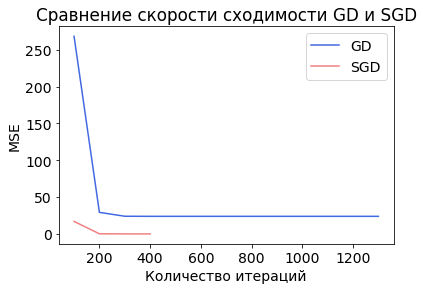

In [1864]:
fig, ax = plt.subplots() 
plt.title('Сравнение скорости сходимости GD и SGD')
 
ax.plot(df['iter'].loc[(df['alpha']==1e-2) & (df['name']=='GD')], df['MSE'].loc[(df['alpha']==1e-2) & (df['name']=='GD')], 
        color = 'royalblue', label = 'GD') 
ax.plot(df['iter'].loc[(df['alpha']==1e-2) & (df['name']=='SGD')], df['MSE'].loc[(df['alpha']==1e-2) & (df['name']=='SGD')],
        color = 'lightcoral', label = 'SGD') 
ax.set_xlabel('Количество итераций')
ax.set_ylabel('MSE')
plt.legend(['GD', 'SGD'], loc=1)
plt.show()


<b>Вывод:</b> Скорость сходимости SGD - выше. Так как ему для достижения минимальной MSE понадобилось 400 итераций при скорости 1е-2, а GD - при той же скорости 1300.

<font color = "red"><b> Почему при приблизительно равных найденных весах эти два алгоритма сообщают о принципиально разной MSE? Она отличается почти в 100 раз.... Как так? При этом у GD точность повыше, а значение MSE больше. Почему?

### Задача 2

Модифицировать решение первого задания путем добавления L2 регуляризации и сравнить результаты.

### Градиентный спуск с использованием L2 регуляризации (Ridge)

In [1865]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + 2 * lambda_ * w)
        if i % 100 == 0:
            print(i, w, err)
            w1, w2, w3, w4 = w
            name = 'GDL2'
            df.loc[len(df)] = [name, iterations, alpha, lambda_, i, w1, w2, w3, w4, err]
    return w, df

In [1866]:
eval_model_reg2(X, y, 1300, alpha=1e-2, lambda_= 1e-8)

100 [83.84068873  6.55300698 40.27389051  0.62893984] 268.236385388746
200 [ 9.52050157e+01  8.03612466e+00  4.72209219e+01 -1.68354940e-03] 29.2516419637525
300 [96.78015433  8.30822932 48.40142492 -0.14552693] 24.00763608836447
400 [97.00182323  8.3540038  48.59804408 -0.17161952] 23.88839239089818
500 [97.0334538   8.36133791 48.63035289 -0.17588455] 23.8856126848396
600 [97.03802347  8.36247786 48.63561228 -0.17653997] 23.885546752235523
700 [97.03869088  8.36265152 48.63646271 -0.17663644] 23.885545167777718
800 [97.03878928  8.36267761 48.63659955 -0.17665017] 23.88554512913027
900 [97.03880391  8.3626815  48.63662149 -0.17665206] 23.885545128145203
1000 [97.0388061   8.36268207 48.636625   -0.17665231] 23.885545128114433
1100 [97.03880643  8.36268216 48.63662556 -0.17665234] 23.885545128112643
1200 [97.03880648  8.36268217 48.63662564 -0.17665235] 23.88554512811244
1300 [97.03880649  8.36268217 48.63662566 -0.17665235] 23.885545128112405


(array([97.03880649,  8.36268217, 48.63662566, -0.17665235]),
      name iterations      alpha    lambda_  \
 0    Base          0          0          0   
 1      GD       1300 0.01000000          0   
 2      GD       1300 0.01000000          0   
 3      GD       1300 0.01000000          0   
 4      GD       1300 0.01000000          0   
 ..    ...        ...        ...        ...   
 154  GDL2       1300 0.01000000 0.00000001   
 155  GDL2       1300 0.01000000 0.00000001   
 156  GDL2       1300 0.01000000 0.00000001   
 157  GDL2       1300 0.01000000 0.00000001   
 158  GDL2       1300 0.01000000 0.00000001   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015

In [1868]:
eval_model_reg2(X, y, 1600, alpha=1e-2, lambda_= 1e-7)

100 [83.84068352  6.55300653 40.27388785  0.62893982] 268.2365623943053
200 [ 9.52050077e+01  8.03612383e+00  4.72209175e+01 -1.68341869e-03] 29.25168280042951
300 [96.78014564  8.30822837 48.40142002 -0.14552674] 24.00764271874584
400 [97.00181439  8.35400283 48.59803906 -0.17161932] 23.88839340234331
500 [97.03344494  8.36133693 48.63034784 -0.17588434] 23.885612838150845
600 [97.0380146   8.36247688 48.63560723 -0.17653976] 23.885546775648315
700 [97.03868202  8.36265054 48.63645765 -0.17663623] 23.885545171458993
800 [97.03878042  8.36267663 48.6365945  -0.17664996] 23.885545129799052
900 [97.03879505  8.36268052 48.63661644 -0.17665185] 23.885545128351907
1000 [97.03879724  8.36268109 48.63661994 -0.1766521 ] 23.885545128249962
1100 [97.03879757  8.36268118 48.6366205  -0.17665213] 23.885545128237194
1200 [97.03879762  8.36268119 48.63662059 -0.17665214] 23.885545128235286
1300 [97.03879763  8.36268119 48.63662061 -0.17665214] 23.885545128234988
1400 [97.03879763  8.36268119 48.63

(array([97.03879763,  8.36268119, 48.63662061, -0.17665214]),
      name iterations      alpha    lambda_  \
 0    Base          0          0          0   
 1      GD       1300 0.01000000          0   
 2      GD       1300 0.01000000          0   
 3      GD       1300 0.01000000          0   
 4      GD       1300 0.01000000          0   
 ..    ...        ...        ...        ...   
 170  GDL2       1600 0.01000000 0.00000010   
 171  GDL2       1600 0.01000000 0.00000010   
 172  GDL2       1600 0.01000000 0.00000010   
 173  GDL2       1600 0.01000000 0.00000010   
 174  GDL2       1600 0.01000000 0.00000010   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015

In [1870]:
eval_model_reg2(X, y, 1600, alpha=1e-2, lambda_= 1e-6)

100 [83.84063134  6.55300194 40.27386131  0.62893969] 268.23833245252416
200 [ 9.52049275e+01  8.03611556e+00  4.72208736e+01 -1.68211161e-03] 29.252091175684704
300 [96.78005869  8.30821893 48.40137103 -0.14552483] 24.007709033045725
400 [97.00172608  8.3539931  48.59798886 -0.17161725] 23.888403527719365
500 [97.03335638  8.36132714 48.63029738 -0.17588224] 23.88561438227225
600 [97.037926    8.36246708 48.63555671 -0.17653765] 23.885547020800526
700 [97.0385934   8.36264074 48.63640713 -0.17663412] 23.885545219298816
800 [97.03869181  8.36266683 48.63654397 -0.17664785] 23.88554514751437
900 [97.03870644  8.36267071 48.63656591 -0.17664974] 23.88554514144652
1000 [97.03870863  8.36267129 48.63656942 -0.17664999] 23.885545140633024
1100 [97.03870896  8.36267137 48.63656998 -0.17665003] 23.885545140510306
1200 [97.03870901  8.36267139 48.63657007 -0.17665003] 23.885545140491356
1300 [97.03870901  8.36267139 48.63657008 -0.17665003] 23.885545140488425
1400 [97.03870901  8.36267139 48.6

(array([97.03870901,  8.36267139, 48.63657008, -0.17665003]),
      name iterations      alpha    lambda_  \
 0    Base          0          0          0   
 1      GD       1300 0.01000000          0   
 2      GD       1300 0.01000000          0   
 3      GD       1300 0.01000000          0   
 4      GD       1300 0.01000000          0   
 ..    ...        ...        ...        ...   
 186  GDL2       1600 0.01000000 0.00000100   
 187  GDL2       1600 0.01000000 0.00000100   
 188  GDL2       1600 0.01000000 0.00000100   
 189  GDL2       1600 0.01000000 0.00000100   
 190  GDL2       1600 0.01000000 0.00000100   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015

In [1872]:
eval_model_reg2(X, y, 2000, alpha=1e-2, lambda_= 1e-5)

100 [83.84010953  6.55295605 40.27359592  0.62893831] 268.25603329695747
200 [ 9.52041258e+01  8.03603279e+00  4.72204348e+01 -1.66904096e-03] 29.256175776524373
300 [96.77918919  8.30812443 48.40088111 -0.14550574] 24.00837322462693
400 [97.00084298  8.3538958  48.59748683 -0.17159658] 23.888505873930043
500 [97.03247076  8.36122926 48.62979277 -0.17586123] 23.885630924359447
600 [97.03703992  8.36236908 48.63505159 -0.17651658] 23.88555057473303
700 [97.03770725  8.36254272 48.63590191 -0.17661304] 23.885546800380894
800 [97.03780564  8.36256881 48.63603873 -0.17662676] 23.885546427399262
900 [97.03782027  8.36257269 48.63606067 -0.17662866] 23.88554637513266
1000 [97.03782246  8.36257327 48.63606417 -0.17662891] 23.88554636720492
1100 [97.03782279  8.36257335 48.63606473 -0.17662894] 23.88554636598301
1200 [97.03782284  8.36257336 48.63606482 -0.17662895] 23.885546365793758
1300 [97.03782285  8.36257337 48.63606484 -0.17662895] 23.88554636576437
1400 [97.03782285  8.36257337 48.6360

(array([97.03782285,  8.36257337, 48.63606484, -0.17662895]),
      name iterations      alpha    lambda_  \
 0    Base          0          0          0   
 1      GD       1300 0.01000000          0   
 2      GD       1300 0.01000000          0   
 3      GD       1300 0.01000000          0   
 4      GD       1300 0.01000000          0   
 ..    ...        ...        ...        ...   
 206  GDL2       2000 0.01000000 0.00001000   
 207  GDL2       2000 0.01000000 0.00001000   
 208  GDL2       2000 0.01000000 0.00001000   
 209  GDL2       2000 0.01000000 0.00001000   
 210  GDL2       2000 0.01000000 0.00001000   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015

In [1874]:
eval_model_reg2(X, y, 1800, alpha=1e-2, lambda_= 1e-4)

100 [83.83489176  6.55249716 40.27094211  0.62892455] 268.433067962402
200 [ 9.51961088e+01  8.03520519e+00  4.72160467e+01 -1.53835247e-03] 29.297106599057145
300 [96.77049503  8.30717963 48.39598243 -0.14531485] 24.01511997789389
400 [96.99201284  8.35292292 48.59246713 -0.17138992] 23.889638558503677
500 [97.0236154   8.36025053 48.62474727 -0.17565121] 23.885906409578215
600 [97.02818009  8.36138924 48.63000093 -0.17630592] 23.885696332040773
700 [97.02884664  8.36156267 48.63085026 -0.17640228] 23.885672856503117
800 [97.0289449   8.36158873 48.63098689 -0.17641598] 23.88566947632814
900 [97.02895951  8.36159261 48.63100879 -0.17641787] 23.885668962900166
1000 [97.02896169  8.36159318 48.6310123  -0.17641812] 23.88566888397156
1100 [97.02896202  8.36159327 48.63101285 -0.17641815] 23.88566887178188
1200 [97.02896207  8.36159328 48.63101294 -0.17641816] 23.88566886989365
1300 [97.02896208  8.36159328 48.63101296 -0.17641816] 23.88566886960045
1400 [97.02896208  8.36159328 48.631012

(array([97.02896208,  8.36159328, 48.63101296, -0.17641816]),
      name iterations      alpha    lambda_  \
 0    Base          0          0          0   
 1      GD       1300 0.01000000          0   
 2      GD       1300 0.01000000          0   
 3      GD       1300 0.01000000          0   
 4      GD       1300 0.01000000          0   
 ..    ...        ...        ...        ...   
 224  GDL2       1800 0.01000000 0.00010000   
 225  GDL2       1800 0.01000000 0.00010000   
 226  GDL2       1800 0.01000000 0.00010000   
 227  GDL2       1800 0.01000000 0.00010000   
 228  GDL2       1800 0.01000000 0.00010000   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015

In [1876]:
eval_model_reg2(X, y, 1900, alpha=1e-2, lambda_= 1e-3)

100 [83.7827421   6.54791092 40.24441881  0.62878703] 270.2060332648961
200 [ 9.51160063e+01  8.02693705e+00  4.71722054e+01 -2.33257857e-04] 29.714881389476176
300 [96.68363669  8.29774223 48.34704725 -0.14340914] 24.093050487544627
400 [96.90379926  8.34320563 48.5423258  -0.16932709] 23.91186513668095
500 [96.93515087  8.35047509 48.57434906 -0.17355488] 23.899644761907574
600 [96.93967101  8.35160268 48.57955137 -0.17420325] 23.89815267671339
700 [96.94032984  8.35177412 48.58039086 -0.17429849] 23.897934902065675
800 [96.94042678  8.35179982 48.58052566 -0.17431201] 23.897901923984325
900 [96.94044117  8.35180364 48.58054723 -0.17431387] 23.897896880810904
1000 [96.94044332  8.3518042  48.58055067 -0.17431412] 23.897896105887895
1100 [96.94044364  8.35180429 48.58055122 -0.17431415] 23.89789598640265
1200 [96.94044369  8.3518043  48.58055131 -0.17431415] 23.897895967927187
1300 [96.9404437   8.3518043  48.58055132 -0.17431415] 23.897895965063622
1400 [96.9404437   8.3518043  48.58

(array([96.9404437 ,  8.3518043 , 48.58055132, -0.17431416]),
      name iterations      alpha    lambda_  \
 0    Base          0          0          0   
 1      GD       1300 0.01000000          0   
 2      GD       1300 0.01000000          0   
 3      GD       1300 0.01000000          0   
 4      GD       1300 0.01000000          0   
 ..    ...        ...        ...        ...   
 243  GDL2       1900 0.01000000 0.00100000   
 244  GDL2       1900 0.01000000 0.00100000   
 245  GDL2       1900 0.01000000 0.00100000   
 246  GDL2       1900 0.01000000 0.00100000   
 247  GDL2       1900 0.01000000 0.00100000   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015

In [1878]:
eval_model_reg2(X, y, 1900, alpha=1e-2, lambda_= 1e-2)

100 [83.26404233  6.50230868 39.98065695  0.62742105] 288.1941137591039
200 [9.43216470e+01 7.94503077e+00 4.67376931e+01 1.26402740e-02] 34.72461269106208
300 [95.82330594  8.20441855 47.8628004  -0.12466694] 25.898178230388243
400 [96.03036529  8.24717594 48.04641852 -0.14906488] 25.201929821441748
500 [96.05931451  8.25388861 48.07598295 -0.15297187] 25.11279755894512
600 [96.06341235  8.25491093 48.08069858 -0.1535601 ] 25.099924026188543
700 [96.06399877  8.25506353 48.08144572 -0.15364494] 25.098016280918408
800 [96.06408349  8.25508599 48.08156351 -0.15365676] 25.097731099712536
900 [96.06409583  8.25508927 48.08158202 -0.15365836] 25.097688244937352
1000 [96.06409764  8.25508974 48.08158492 -0.15365857] 25.097681778878307
1100 [96.06409791  8.25508981 48.08158537 -0.15365859] 25.097680799991327
1200 [96.06409795  8.25508982 48.08158544 -0.1536586 ] 25.097680651382667
1300 [96.06409796  8.25508982 48.08158545 -0.1536586 ] 25.097680628768206
1400 [96.06409796  8.25508982 48.08158

(array([96.06409796,  8.25508982, 48.08158545, -0.1536586 ]),
      name iterations      alpha    lambda_  \
 0    Base          0          0          0   
 1      GD       1300 0.01000000          0   
 2      GD       1300 0.01000000          0   
 3      GD       1300 0.01000000          0   
 4      GD       1300 0.01000000          0   
 ..    ...        ...        ...        ...   
 262  GDL2       1900 0.01000000 0.01000000   
 263  GDL2       1900 0.01000000 0.01000000   
 264  GDL2       1900 0.01000000 0.01000000   
 265  GDL2       1900 0.01000000 0.01000000   
 266  GDL2       1900 0.01000000 0.01000000   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015

<table>
<tr><th>Модель</th><th>Число итераций</th><th>Alpha</th><th>Lambda</th><th>MSE</th><th>Вес 1</th><th>Вес 2</th><th>Вес 3</th><th>Вес 4</th></tr>
    
<tr><td>Исходные данные</td><td>-</td><td>-</td><td>-</td><td>-</td><td>97.246139</td><td>8.54030302</td><td>48.50179875</td><td>0.</td></tr>
    
<tr><td>GD (1e-2)</td><td>1300</td><td>1e-2</td><td>-</td><td>23.885545128111165</td><td>97.03880748</td><td>8.36268228</td><td>48.63662622</td><td>-0.17665237</td></tr>

<tr><td>GDL2 (1e-2)</td><td>1300</td><td>1e-2</td><td>1e-8</td><td>23.885545128112405</td><td>97.03880649</td><td>8.36268217</td><td>48.63662566</td><td>-0.17665235</td></tr>

<tr><td>GDL2 (1e-2)</td><td>1600</td><td>1e-2</td><td>1e-7</td><td>23.88554512823493</td><td>97.03879763</td><td>8.36268119</td><td>48.63662061</td><td>-0.17665214</td></tr>

<tr><td>GDL2 (1e-2)</td><td>1600</td><td>1e-2</td><td>1e-6</td><td>23.885545140487878</td><td>97.03870901</td><td>8.36267139</td><td>48.58055132</td><td>-0.17665003</td></tr>
    
<tr><td>GDL2 (1e-2)</td><td>2000</td><td>1e-2</td><td>1e-5</td><td>23.88554636575895</td><td>97.03782285</td><td>8.36257337</td><td>48.63657008</td><td>-0.17431416</td></tr>
    
<tr><td>GDL2 (1e-2)</td><td>1800</td><td>1e-2</td><td>1e-4</td><td>23.88566886954641</td><td>97.02896208</td><td>8.36159328</td><td>48.63101296</td><td>-0.17641816</td></tr>
    
<tr><td>GDL2 (1e-2)</td><td>1900</td><td>1e-2</td><td>1e-3</td><td>23.897895964537</td><td>96.9404437</td><td>8.3518043</td><td>48.58055132</td><td>-0.17431416</td></tr>
   
<tr><td>GDL2 (1e-2)</td><td>1900</td><td>1e-2</td><td>1e-2</td><td>25.097680624698917</td><td>96.06409796</td><td>8.25508982</td><td>48.08158545</td><td>-0.1536586</td></tr>

</table>

<font color = 'red'><b> И все-таки я не поняла - нужно ли подбирать значение лямбда и если да, то по каким критериям? Как определить подходящий? 

In [1880]:
#Называет оси на нескольких диаграммах одновременно
def axis_name(cols, axis, name):
    if cols == 0:
        for i in ax:
            if axis == 'x':
                i.set_xlabel(name)
            else:
                i.set_ylabel(name)
    else:
        for row in ax:
                for i in row:
                    if axis == 'x':
                        i.set_xlabel(name)
                    else:
                        i.set_ylabel(name)

Text(1, 25, 'Почему при 1e-2, такой резкий рост?')

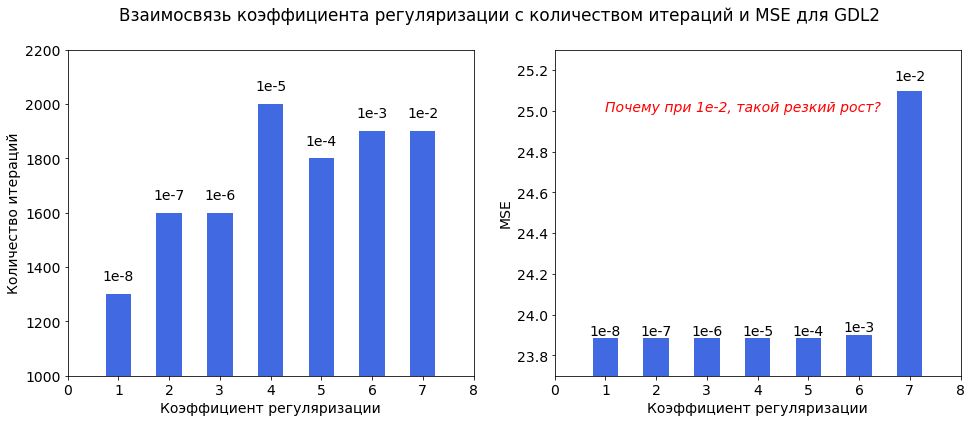

In [1881]:
fig, ax = plt.subplots(ncols = 2, figsize=(16,6))
axis_name(0, 'x', 'Коэффициент регуляризации')
fig.suptitle('Взаимосвязь коэффициента регуляризации с количеством итераций и MSE для GDL2')

#Коэффициент регуляризации - количество итераций
draw_bar(0, 0, 0, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3], [7, 1e-2]], 'iter', 'lambda_', 'GDL2', 
         'royalblue', 0.5, 'max')
set_title(0, 0, 0, [[1, 1350, '1e-8'], [2, 1650, '1e-7'], [3, 1650, '1e-6'], [4, 2050, '1e-5'], [5, 1850, '1e-4'], 
                 [6, 1950, '1e-3'], [7, 1950, '1e-2']], 'center')
ax[0].set_xlim([0, 8])
ax[0].set_ylim(1000, 2200)
ax[0].set_ylabel('Количество итераций')

#Коэффициент регуляризации - MSE
draw_bar(0, 1, 0, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3], [7, 1e-2]], 'MSE', 'lambda_', 'GDL2', 
         'royalblue', 0.5, 'min')
set_title(0, 1, 0, [[1, 23.9, '1e-8'], [2, 23.9, '1e-7'], [3, 23.9, '1e-6'], [4, 23.9, '1e-5'], [5, 23.9, '1e-4'], 
                 [6, 23.92, '1e-3'], [7, 25.15, '1e-2']], 'center')
ax[1].set_ylabel('MSE')
ax[1].set_xlim([0, 8])
ax[1].set_ylim(23.7, 25.3)
ax[1].text(1, 25, 'Почему при 1e-2, такой резкий рост?', horizontalalignment = 'left', style = 'italic', color = 'red')



Наверное, можно сделать вывод, что с ростом коэффициента регуляризации растет и количество итераций, необходимых для нахождения минимума. Но это зависимость не пропорциональная.

<font color = 'red'><b> Есть ли какая-то взаимосвязь между величиной коэффициента регуляризации и MSE? Почему такой внезапный рост при 1e-2? Ничто не предвещало же...

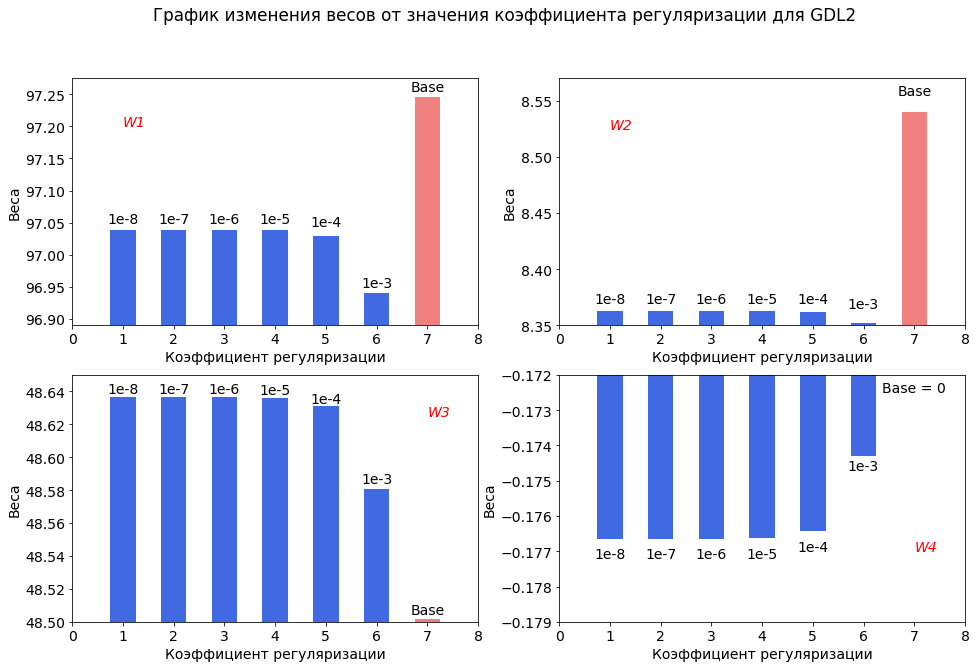

In [1882]:
fig , ax = plt.subplots(nrows = 2, ncols = 2, figsize=(16,10))
axis_name(2, 'x', 'Коэффициент регуляризации')
axis_name(2, 'y', 'Веса')

#w1 - коэффициент регуляризации
draw_bar(0, 0, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w1', 'lambda_', 'GDL2', 'royalblue',
         0.5, 'max')
set_title(0, 0, 2, [[1, 97.05, '1e-8'], [2, 97.05, '1e-7'], [3, 97.05, '1e-6'], [4, 97.05, '1e-5'], [5, 97.045, '1e-4'], 
           [6, 96.95, '1e-3'], [7, 97.255, 'Base']], 'center')
ax[0][0].bar(7, df['w1'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[0][0].set_ylim([96.89, 97.275])
ax[0][0].set_xlim([0, 8])
ax[0][0].text(1, 97.20, 'W1', horizontalalignment = 'left', style = 'italic', color = 'red')

#w2 - коэффициент регуляризации
draw_bar(0, 1, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w2', 'lambda_', 'GDL2', 'royalblue',
         0.5, 'max')
set_title(0, 1, 2, [[1, 8.37, '1e-8'], [2, 8.37, '1e-7'], [3, 8.37, '1e-6'], [4, 8.37, '1e-5'], [5, 8.37, '1e-4'], 
           [6, 8.365, '1e-3'], [7, 8.555, 'Base']], 'center')
ax[0][1].bar(7, df['w2'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[0][1].set_ylim([8.35, 8.57])
ax[0][1].set_xlim([0, 8])
ax[0][1].text(1, 8.525, 'W2', horizontalalignment = 'left', style = 'italic', color = 'red')

#w3 - коэффициент регуляризации
draw_bar(1, 0, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w3', 'lambda_', 'GDL2', 'royalblue',
         0.5, 'max')
set_title(1, 0, 2, [[1, 48.639, '1e-8'], [2, 48.639, '1e-7'], [3, 48.639, '1e-6'], [4, 48.638, '1e-5'], [5, 48.633, '1e-4'], 
           [6, 48.584, '1e-3'], [7, 48.505, 'Base']], 'center')
ax[1][0].bar(7, df['w3'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[1][0].set_ylim([48.50, 48.65])
ax[1][0].set_xlim([0, 8])
ax[1][0].text(7, 48.625, 'W3', horizontalalignment = 'left', style = 'italic', color = 'red')

#w4 - коэффициент регуляризации
draw_bar(1, 1, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w4', 'lambda_', 'GDL2', 'royalblue',
         0.5, 'min')
set_title(1, 1, 2, [[1, -0.1772, '1e-8'], [2, -0.1772, '1e-7'], [3, -0.1772, '1e-6'], [4, -0.1772, '1e-5'], 
                    [5, -0.1770, '1e-4'], [6, -0.1747, '1e-3'], [7, -0.1725, 'Base = 0']], 'center')
ax[1][1].bar(7, df['w4'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[1][1].set_ylim([-0.179, -0.172])
ax[1][1].set_xlim([0, 8])
ax[1][1].text(7, -0.177, 'W4', horizontalalignment = 'left', style = 'italic', color = 'red')

fig.suptitle('График изменения весов от значения коэффициента регуляризации для GDL2')
plt.show()

Значимость весов w1, w2, w3 уменьшается, а веса w4 - увеличивается.

### Стохастический градиентный спуск с использованием L2 регуляризации (Ridge)

In [1883]:
# mini-batch GD & SGD
def eval_SGD_L2(X, y, iterations, qty_in_batch=1, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp) + 2 * lambda_ * w)
        if i % 100 == 0:
            print(i, w, err)
            w1, w2, w3, w4 = w
            name = 'SGDL2'
            df.loc[len(df)] = [name, iterations, alpha, lambda_, i, w1, w2, w3, w4, err]
    return w, df

In [1884]:
eval_SGD_L2(X, y, 400, 1, 1e-2, 1e-8)

100 [83.57935517  6.52860077 40.14578544  0.63172039] 16.999234905466427
200 [9.51312799e+01 8.02496055e+00 4.71753905e+01 1.32981339e-03] 0.20406896935790625
300 [96.76295173  8.30427219 48.3892336  -0.14527093] 0.03023118139140338
400 [96.9968268   8.35214238 48.59477339 -0.17241531] 0.029778075462400595


(array([96.9968268 ,  8.35214238, 48.59477339, -0.17241531]),
       name iterations      alpha    lambda_  \
 0     Base          0          0          0   
 1       GD       1300 0.01000000          0   
 2       GD       1300 0.01000000          0   
 3       GD       1300 0.01000000          0   
 4       GD       1300 0.01000000          0   
 ..     ...        ...        ...        ...   
 266   GDL2       1900 0.01000000 0.01000000   
 267  SGDL2        400 0.01000000 0.00000001   
 268  SGDL2        400 0.01000000 0.00000001   
 269  SGDL2        400 0.01000000 0.00000001   
 270  SGDL2        400 0.01000000 0.00000001   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              

In [1885]:
eval_SGD_L2(X, y, 400, 1, 1e-2, 1e-7)

100 [83.57415699  6.52814208 40.14314198  0.63170771] 17.015593201321433
200 [9.51232784e+01 8.02413405e+00 4.71710148e+01 1.46006164e-03] 0.20662759090417426
300 [96.75426036  8.30332711 48.38434076 -0.14508019] 0.031259601849738736
400 [96.98799444  8.3511684  48.58975605 -0.17220843] 0.030798672418639293


(array([96.98799444,  8.3511684 , 48.58975605, -0.17220843]),
       name iterations      alpha    lambda_  \
 0     Base          0          0          0   
 1       GD       1300 0.01000000          0   
 2       GD       1300 0.01000000          0   
 3       GD       1300 0.01000000          0   
 4       GD       1300 0.01000000          0   
 ..     ...        ...        ...        ...   
 270  SGDL2        400 0.01000000 0.00000001   
 271  SGDL2        400 0.01000000 0.00000010   
 272  SGDL2        400 0.01000000 0.00000010   
 273  SGDL2        400 0.01000000 0.00000010   
 274  SGDL2        400 0.01000000 0.00000010   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              

In [1886]:
eval_SGD_L2(X, y, 400, 1, 1e-2, 1e-6)

100 [83.5222033   6.52355786 40.1167222   0.63158094] 17.179525817236904
200 [9.50433296e+01 8.01587683e+00 4.71272972e+01 2.76075742e-03] 0.23307029051949554
300 [96.66742974  8.29388695 48.33546381 -0.14317603] 0.04248025746931541
400 [96.89975869  8.34144018 48.53963821 -0.1701434 ] 0.04194089742608848


(array([96.89975869,  8.34144018, 48.53963821, -0.1701434 ]),
       name iterations      alpha    lambda_  \
 0     Base          0          0          0   
 1       GD       1300 0.01000000          0   
 2       GD       1300 0.01000000          0   
 3       GD       1300 0.01000000          0   
 4       GD       1300 0.01000000          0   
 ..     ...        ...        ...        ...   
 274  SGDL2        400 0.01000000 0.00000010   
 275  SGDL2        400 0.01000000 0.00000100   
 276  SGDL2        400 0.01000000 0.00000100   
 277  SGDL2        400 0.01000000 0.00000100   
 278  SGDL2        400 0.01000000 0.00000100   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              

In [1887]:
eval_SGD_L2(X, y, 400, 1, 1e-2, 1e-5)

100 [83.00546629  6.47797787 39.85399868  0.63032067] 18.85341408741176
200 [9.42504858e+01 7.93407826e+00 4.66940070e+01 1.55906653e-02] 0.5818593800290759
300 [95.8073639   8.20053457 47.85178665 -0.12444826] 0.2468364348673046
400 [96.02610056  8.24530145 48.04395956 -0.14985881] 0.24549675317381434


(array([96.02610056,  8.24530145, 48.04395956, -0.14985881]),
       name iterations      alpha    lambda_  \
 0     Base          0          0          0   
 1       GD       1300 0.01000000          0   
 2       GD       1300 0.01000000          0   
 3       GD       1300 0.01000000          0   
 4       GD       1300 0.01000000          0   
 ..     ...        ...        ...        ...   
 278  SGDL2        400 0.01000000 0.00000100   
 279  SGDL2        400 0.01000000 0.00001000   
 280  SGDL2        400 0.01000000 0.00001000   
 281  SGDL2        400 0.01000000 0.00001000   
 282  SGDL2        400 0.01000000 0.00001000   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              

In [1888]:
eval_SGD_L2(X, y, 400, 1, 1e-2, 1e-4)

100 [78.1061108   6.04724876 37.36774407  0.61839112] 38.67167289385711
200 [86.93981967  7.18762464 42.72122285  0.12769812] 11.344468923655834
300 [8.79612390e+01 7.36213879e+00 4.34783417e+01 3.48800348e-02] 10.168053881381386
400 [8.80810887e+01 7.38664471e+00 4.35833314e+01 2.08420141e-02] 10.159376353930378


(array([8.80810887e+01, 7.38664471e+00, 4.35833314e+01, 2.08420141e-02]),
       name iterations      alpha    lambda_  \
 0     Base          0          0          0   
 1       GD       1300 0.01000000          0   
 2       GD       1300 0.01000000          0   
 3       GD       1300 0.01000000          0   
 4       GD       1300 0.01000000          0   
 ..     ...        ...        ...        ...   
 282  SGDL2        400 0.01000000 0.00001000   
 283  SGDL2        400 0.01000000 0.00010000   
 284  SGDL2        400 0.01000000 0.00010000   
 285  SGDL2        400 0.01000000 0.00010000   
 286  SGDL2        400 0.01000000 0.00010000   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                  

In [1889]:
eval_SGD_L2(X, y, 400, 1, 1e-2, 1e-3)

100 [47.29503911  3.41877003 21.98527823  0.53004119] 336.8516740873477
200 [48.17468144  3.52974652 22.50152223  0.47254591] 325.2267869149377
300 [48.19147661  3.5325807  22.51362116  0.47085129] 325.09350218964045
400 [48.19180201  3.53264683 22.51389896  0.47080986] 325.0928088163008


(array([48.19180201,  3.53264683, 22.51389896,  0.47080986]),
       name iterations      alpha    lambda_  \
 0     Base          0          0          0   
 1       GD       1300 0.01000000          0   
 2       GD       1300 0.01000000          0   
 3       GD       1300 0.01000000          0   
 4       GD       1300 0.01000000          0   
 ..     ...        ...        ...        ...   
 286  SGDL2        400 0.01000000 0.00010000   
 287  SGDL2        400 0.01000000 0.00100000   
 288  SGDL2        400 0.01000000 0.00100000   
 289  SGDL2        400 0.01000000 0.00100000   
 290  SGDL2        400 0.01000000 0.00100000   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              

<table>
<tr><th>Модель</th><th>Число итераций</th><th>Alpha</th><th>Lambda</th><th>MSE</th><th>Вес 1</th><th>Вес 2</th><th>Вес 3</th><th>Вес 4</th></tr>
    
<tr><td>Исходные данные</td><td>-</td><td>-</td><td>-</td><td>-</td><td>97.246139</td><td>8.54030302</td><td>48.50179875</td><td>0.</td></tr>
    
<tr><td>SGD (1e-2)</td><td>400</td><td>1e-2</td><td>-</td><td>0.029665728288381207</td><td>96.99780828</td><td>8.35225061</td><td>48.59533094</td><td>-0.1724383</td></tr>
    
<tr><td>SGDL2 (1e-2)</td><td>400</td><td>1e-2</td><td>1e-8</td><td>0.029778075462400595</td><td>96.9968268</td><td>8.35214238</td><td>48.59477339</td><td>-0.17241531</td></tr>

<tr><td>SGDL2 (1e-2)</td><td>400</td><td>1e-2</td><td>1e-7</td><td>0.030798672418639293</td><td>96.98799444</td><td>8.3511684</td><td>48.58975605</td><td>-0.17220843</td></tr>

<tr><td>SGDL2 (1e-2)</td><td>400</td><td>1e-2</td><td>1e-6</td><td>0.04194089742608848</td><td>96.89975869</td><td>8.34144018</td><td>48.53963821</td><td>-0.1701434</td></tr>
   
<tr><td>SGDL2 (1e-2)</td><td>400</td><td>1e-2</td><td>1e-5</td><td>0.24549675317381434</td><td>96.02610056</td><td>8.24530145</td><td>48.04395956</td><td>-0.14985881</td></tr>
    
<tr><td>SGDL2 (1e-2)</td><td>400</td><td>1e-2</td><td>1e-4</td><td>10.159376353930378</td><td>8.80810887e+01</td><td>7.38664471e+00</td><td>4.35833314e+01</td><td>2.08420141e-02</td></tr>
    
<tr><td>SGDL2 (1e-2)</td><td>400</td><td>1e-2</td><td>1e-3</td><td>325.0928088163008</td><td>48.19180201</td><td>3.53264683</td><td>22.51389896</td><td>0.47080986</td></tr>
    
</table>

Text(0.5, 0.98, 'Взаимосвязь коэффициента регуляризации с количеством итераций и MSE для SGDL2')

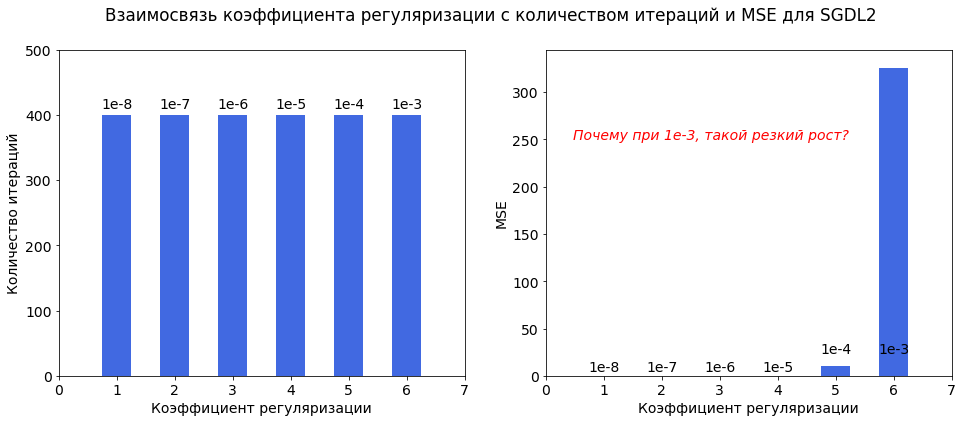

In [1890]:
fig, ax = plt.subplots(ncols = 2, figsize=(16,6))
axis_name(0, 'x', 'Коэффициент регуляризации')

#Коэффициент регуляризации - количество итераций
draw_bar(0, 0, 0, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'iter', 'lambda_', 'SGDL2', 
         'royalblue', 0.5, 'max')
set_title(0, 0, 0, [[1, 410, '1e-8'], [2, 410, '1e-7'], [3, 410, '1e-6'], [4, 410, '1e-5'], [5, 410, '1e-4'], 
                 [6, 410, '1e-3']], 'center')
ax[0].set_xlim([0, 7])
ax[0].set_ylim(0, 500)
ax[0].set_ylabel('Количество итераций')

#Коэффициент регуляризации - MSE
draw_bar(0, 1, 0, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'MSE', 'lambda_', 'SGDL2', 
         'royalblue', 0.5, 'min')
set_title(0, 1, 0, [[1, 5, '1e-8'], [2, 5, '1e-7'], [3, 5, '1e-6'], [4, 5, '1e-5'], [5, 23.9, '1e-4'], 
                 [6, 23.92, '1e-3']], 'center')
ax[1].set_ylabel('MSE')
ax[1].set_xlim([0, 7])
ax[1].set_ylim(0, 345)
ax[1].text(0, 250, '      Почему при 1e-3, такой резкий рост?', horizontalalignment = 'left', style = 'italic', color = 'red')

fig.suptitle('Взаимосвязь коэффициента регуляризации с количеством итераций и MSE для SGDL2')

Коэффициент регуляризации не влияет на количество итераций. Начиная с некоторого уровня роста коэффициента регуляризации MSE начинает значительно прирастать.

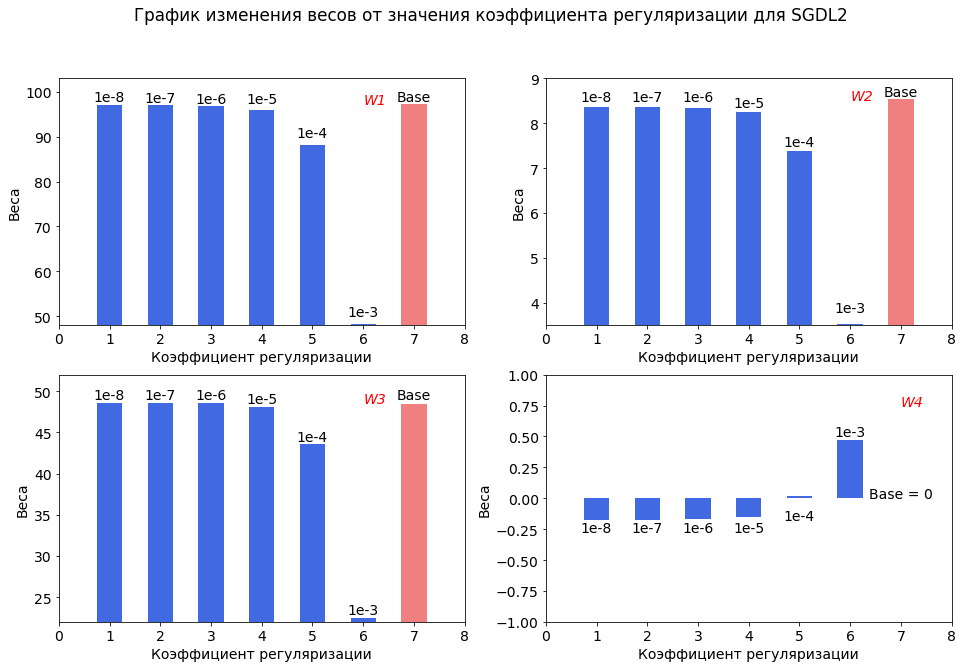

In [1891]:
fig , ax = plt.subplots(nrows = 2, ncols = 2, figsize=(16,10))
axis_name(2, 'x', 'Коэффициент регуляризации')
axis_name(2, 'y', 'Веса')

#w1 - коэффициент регуляризации
draw_bar(0, 0, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w1', 'lambda_', 'SGDL2', 'royalblue',
         0.5, 'max')
set_title(0, 0, 2, [[1, 98, '1e-8'], [2, 97.6, '1e-7'], [3, 97.4, '1e-6'], [4, 97.4, '1e-5'], [5, 90.0, '1e-4'], 
           [6, 50, '1e-3'], [7, 97.9, 'Base']], 'center')
ax[0][0].bar(7, df['w1'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[0][0].set_ylim([48, 103])
ax[0][0].set_xlim([0, 8])
ax[0][0].text(6, 97.20, 'W1', horizontalalignment = 'left', style = 'italic', color = 'red')

#w2 - коэффициент регуляризации
draw_bar(0, 1, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w2', 'lambda_', 'SGDL2', 'royalblue',
         0.5, 'max')
set_title(0, 1, 2, [[1, 8.5, '1e-8'], [2, 8.5, '1e-7'], [3, 8.5, '1e-6'], [4, 8.37, '1e-5'], [5, 7.5, '1e-4'], 
           [6, 3.8, '1e-3'], [7, 8.6, 'Base']], 'center')
ax[0][1].bar(7, df['w2'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[0][1].set_ylim([3.5, 9])
ax[0][1].set_xlim([0, 8])
ax[0][1].text(6, 8.525, 'W2', horizontalalignment = 'left', style = 'italic', color = 'red')

#w3 - коэффициент регуляризации
draw_bar(1, 0, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w3', 'lambda_', 'SGDL2', 'royalblue',
         0.5, 'max')
set_title(1, 0, 2, [[1, 49, '1e-8'], [2, 49, '1e-7'], [3, 49, '1e-6'], [4, 48.6, '1e-5'], [5, 44, '1e-4'], 
           [6, 23, '1e-3'], [7, 49, 'Base']], 'center')
ax[1][0].bar(7, df['w3'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[1][0].set_ylim([22, 52])
ax[1][0].set_xlim([0, 8])
ax[1][0].text(6, 48.625, 'W3', horizontalalignment = 'left', style = 'italic', color = 'red')

#w4 - коэффициент регуляризации
draw_bar(1, 1, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w4', 'lambda_', 'SGDL2', 'royalblue',
         0.5, 'min')
set_title(1, 1, 2, [[1, -0.27, '1e-8'], [2, -0.27, '1e-7'], [3, -0.27, '1e-6'], [4, -0.27, '1e-5'], 
                    [5, -0.1770, '1e-4'], [6, 0.5, '1e-3'], [7, 0, 'Base = 0']], 'center')
ax[1][1].bar(7, df['w4'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[1][1].set_ylim([-1, 1])
ax[1][1].set_xlim([0, 8])
ax[1][1].text(7, 0.75, 'W4', horizontalalignment = 'left', style = 'italic', color = 'red')

fig.suptitle('График изменения весов от значения коэффициента регуляризации для SGDL2')
plt.show()

С ростом значения коэффициента регуляризации, значимость весов w1, w2, w3 уменьшается, а w4 - увеличивается.

### Задача 3

Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

### Градиентный спуск с использованием L1 регуляризации (Lasso)

In [1892]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * np.abs(w))
        if i % 100 == 0:
            print(i, w, err)
            w1, w2, w3, w4 = w
            name = 'GDL1'
            df.loc[len(df)] = [name, iterations, alpha, lambda_, i, w1, w2, w3, w4, err]
    return w, df

In [1893]:
eval_model_reg1(X, y, 1600, alpha=1e-2, lambda_=1e-8)

100 [83.84068902  6.55300701 40.27389065  0.62893984] 268.23637555512505
200 [ 9.52050162e+01  8.03612471e+00  4.72209222e+01 -1.68355666e-03] 29.251639695053413
300 [96.78015482  8.30822937 48.40142519 -0.14552694] 24.00763571995747
400 [97.00182372  8.35400386 48.59804436 -0.17161954] 23.888392334696764
500 [97.03345429  8.36133796 48.63035317 -0.17588456] 23.885612676325493
600 [97.03802396  8.36247791 48.63561256 -0.17653998] 23.885546750940296
700 [97.03869137  8.36265157 48.63646299 -0.17663646] 23.885545167579025
800 [97.03878978  8.36267767 48.63659983 -0.17665018] 23.88554512909899
900 [97.03880441  8.36268155 48.63662177 -0.17665207] 23.8855451281396
1000 [97.0388066   8.36268213 48.63662528 -0.17665233] 23.88554512811278
1100 [97.03880693  8.36268221 48.63662584 -0.17665236] 23.88554512811161
1200 [97.03880698  8.36268222 48.63662593 -0.17665236] 23.885545128111495
1300 [97.03880698  8.36268222 48.63662594 -0.17665236] 23.88554512811148
1400 [97.03880699  8.36268222 48.63662

(array([97.03880699,  8.36268222, 48.63662594, -0.17665236]),
      name iterations      alpha    lambda_  \
 0    Base          0          0          0   
 1      GD       1300 0.01000000          0   
 2      GD       1300 0.01000000          0   
 3      GD       1300 0.01000000          0   
 4      GD       1300 0.01000000          0   
 ..    ...        ...        ...        ...   
 302  GDL1       1600 0.01000000 0.00000001   
 303  GDL1       1600 0.01000000 0.00000001   
 304  GDL1       1600 0.01000000 0.00000001   
 305  GDL1       1600 0.01000000 0.00000001   
 306  GDL1       1600 0.01000000 0.00000001   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015

In [1895]:
eval_model_reg1(X, y, 1800, alpha=1e-2, lambda_=1e-7)

100 [83.84068642  6.55300678 40.27388933  0.62893983] 268.23646405806863
200 [ 9.52050122e+01  8.03612429e+00  4.72209200e+01 -1.68349130e-03] 29.2516601133732
300 [96.78015047  8.3082289  48.40142274 -0.14552686] 24.00763903459639
400 [97.0018193   8.35400337 48.59804185 -0.17161945] 23.888392840246357
500 [97.03344986  8.36133748 48.63035064 -0.17588447] 23.885612752926292
600 [97.03801953  8.36247742 48.63561003 -0.17653989] 23.88554676261244
700 [97.03868694  8.36265108 48.63646046 -0.17663637] 23.885545169388514
800 [97.03878535  8.36267718 48.6365973  -0.17665009] 23.885545129402672
900 [97.03879998  8.36268106 48.63661924 -0.17665198] 23.885545128212303
1000 [97.03880217  8.36268164 48.63662275 -0.17665224] 23.885545128149907
1100 [97.0388025   8.36268172 48.63662331 -0.17665227] 23.88554512814324
1200 [97.03880255  8.36268173 48.6366234  -0.17665227] 23.885545128142283
1300 [97.03880255  8.36268173 48.63662341 -0.17665227] 23.885545128142127
1400 [97.03880256  8.36268173 48.636

(array([97.03880256,  8.36268173, 48.63662342, -0.17665227]),
      name iterations      alpha    lambda_  \
 0    Base          0          0          0   
 1      GD       1300 0.01000000          0   
 2      GD       1300 0.01000000          0   
 3      GD       1300 0.01000000          0   
 4      GD       1300 0.01000000          0   
 ..    ...        ...        ...        ...   
 320  GDL1       1800 0.01000000 0.00000010   
 321  GDL1       1800 0.01000000 0.00000010   
 322  GDL1       1800 0.01000000 0.00000010   
 323  GDL1       1800 0.01000000 0.00000010   
 324  GDL1       1800 0.01000000 0.00000010   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015

In [1897]:
eval_model_reg1(X, y, 1700, alpha=1e-2, lambda_=1e-6)

100 [83.84066033  6.55300449 40.27387606  0.62893976] 268.2373490881612
200 [ 9.52049721e+01  8.03612015e+00  4.72208980e+01 -1.68283776e-03] 29.251864298692244
300 [96.780107    8.30822418 48.40139824 -0.14552599] 24.00767218360711
400 [97.00177515  8.35399851 48.59801675 -0.17161855] 23.888397898473315
500 [97.03340559  8.36133258 48.63032541 -0.17588357] 23.885613521686203
600 [97.03797523  8.36247252 48.63558477 -0.17653899] 23.88554688208959
700 [97.03864264  8.36264618 48.6364352  -0.17663547] 23.885545190239828
800 [97.03874104  8.36267228 48.63657204 -0.17664919] 23.88554513519604
900 [97.03875567  8.36267616 48.63659398 -0.17665109] 23.885545131695917
1000 [97.03875786  8.36267674 48.63659748 -0.17665134] 23.885545131277816
1100 [97.03875819  8.36267682 48.63659804 -0.17665137] 23.885545131216187
1200 [97.03875824  8.36267683 48.63659813 -0.17665138] 23.885545131206708
1300 [97.03875825  8.36267683 48.63659815 -0.17665138] 23.88554513120524
1400 [97.03875825  8.36267683 48.636

(array([97.03875825,  8.36267683, 48.63659815, -0.17665138]),
      name iterations      alpha    lambda_  \
 0    Base          0          0          0   
 1      GD       1300 0.01000000          0   
 2      GD       1300 0.01000000          0   
 3      GD       1300 0.01000000          0   
 4      GD       1300 0.01000000          0   
 ..    ...        ...        ...        ...   
 337  GDL1       1700 0.01000000 0.00000100   
 338  GDL1       1700 0.01000000 0.00000100   
 339  GDL1       1700 0.01000000 0.00000100   
 340  GDL1       1700 0.01000000 0.00000100   
 341  GDL1       1700 0.01000000 0.00000100   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015

In [1899]:
eval_model_reg1(X, y, 1700, alpha=1e-2, lambda_=1e-5)

100 [83.84039942  6.55298154 40.27374336  0.62893907] 268.24619945466077
200 [ 9.52045712e+01  8.03607877e+00  4.72206786e+01 -1.67630237e-03] 29.253906363958553
300 [96.77967226  8.30817693 48.40115327 -0.14551732] 24.008003935858238
400 [97.00133363  8.35394987 48.59776571 -0.17160961] 23.888448753834485
500 [97.03296282  8.36128365 48.63007307 -0.1758746 ] 23.885621484475326
600 [97.03753224  8.36242353 48.63533218 -0.17653002] 23.885548352433382
700 [97.03819961  8.36259718 48.63618255 -0.1766265 ] 23.88554567439305
800 [97.03829801  8.36262328 48.63631938 -0.17664022] 23.885545468781753
900 [97.03831264  8.36262716 48.63634132 -0.17664211] 23.88554544218607
1000 [97.03831483  8.36262774 48.63634483 -0.17664237] 23.88554543821128
1100 [97.03831516  8.36262782 48.63634539 -0.1766424 ] 23.885545437600094
1200 [97.03831521  8.36262783 48.63634547 -0.1766424 ] 23.885545437505467
1300 [97.03831522  8.36262783 48.63634549 -0.17664241] 23.885545437490773
1400 [97.03831522  8.36262783 48.6

(array([97.03831522,  8.36262783, 48.63634549, -0.17664241]),
      name iterations      alpha    lambda_  \
 0    Base          0          0          0   
 1      GD       1300 0.01000000          0   
 2      GD       1300 0.01000000          0   
 3      GD       1300 0.01000000          0   
 4      GD       1300 0.01000000          0   
 ..    ...        ...        ...        ...   
 354  GDL1       1700 0.01000000 0.00001000   
 355  GDL1       1700 0.01000000 0.00001000   
 356  GDL1       1700 0.01000000 0.00001000   
 357  GDL1       1700 0.01000000 0.00001000   
 358  GDL1       1700 0.01000000 0.00001000   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015

In [1901]:
eval_model_reg1(X, y, 1800, alpha=1e-2, lambda_=1e-4)

100 [83.83779045  6.55275205 40.27241641  0.62893219] 268.33470967541354
200 [ 9.52005625e+01  8.03566494e+00  4.72184845e+01 -1.61095299e-03] 29.274348222226966
300 [96.7753251   8.30770453 48.39870369 -0.14543059] 24.01134767016282
400 [96.9969187   8.35346346 48.59525545 -0.17152023] 23.88898461379529
500 [97.02853538  8.36079435 48.62754985 -0.17578492] 23.885728628492583
600 [97.03310259  8.36193368 48.63280635 -0.17644031] 23.88559061021725
700 [97.03376957  8.36210723 48.63365622 -0.17653679] 23.88557807705795
800 [97.03386791  8.36213331 48.63379296 -0.17655051] 23.88557636695738
900 [97.03388253  8.36213719 48.63381488 -0.1765524 ] 23.885576109611073
1000 [97.03388471  8.36213776 48.63381839 -0.17655266] 23.885576070104413
1100 [97.03388504  8.36213785 48.63381895 -0.17655269] 23.885576064003654
1200 [97.03388509  8.36213786 48.63381904 -0.17655269] 23.885576063058526
1300 [97.0338851   8.36213786 48.63381905 -0.17655269] 23.88557606291175
1400 [97.0338851   8.36213786 48.6338

(array([97.0338851 ,  8.36213786, 48.63381905, -0.17655269]),
      name iterations      alpha    lambda_  \
 0    Base          0          0          0   
 1      GD       1300 0.01000000          0   
 2      GD       1300 0.01000000          0   
 3      GD       1300 0.01000000          0   
 4      GD       1300 0.01000000          0   
 ..    ...        ...        ...        ...   
 372  GDL1       1800 0.01000000 0.00010000   
 373  GDL1       1800 0.01000000 0.00010000   
 374  GDL1       1800 0.01000000 0.00010000   
 375  GDL1       1800 0.01000000 0.00010000   
 376  GDL1       1800 0.01000000 0.00010000   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015

In [1903]:
eval_model_reg1(X, y, 2000, alpha=1e-2, lambda_=1e-3)

100 [83.8117078   6.55045783 40.25915067  0.62886341] 269.2204670266992
200 [ 9.51604926e+01  8.03152866e+00  4.71965529e+01 -9.57907004e-04] 29.48088550820245
300 [96.73187435  8.30298315 48.3742208  -0.14456334] 24.04740359538568
400 [96.95279132  8.34860233 48.57016686 -0.17062645] 23.897071033614747
500 [96.98428318  8.35590428 48.60233185 -0.17488813] 23.889548814271613
600 [96.98882832  8.35703811 48.6075624  -0.17554324] 23.88876574419772
700 [96.9894915   8.35721067 48.60840729 -0.1756397 ] 23.888655336141625
800 [96.98958919  8.35723657 48.6085431  -0.17565343] 23.88863869926263
900 [96.9896037   8.35724042 48.60856485 -0.17565532] 23.88863615480674
1000 [96.98960587  8.35724099 48.60856832 -0.17565558] 23.88863576347379
1100 [96.9896062   8.35724108 48.60856887 -0.17565561] 23.888635703071312
1200 [96.98960625  8.35724109 48.60856896 -0.17565561] 23.88863569372164
1300 [96.98960625  8.35724109 48.60856898 -0.17565561] 23.888635692270967
1400 [96.98960626  8.35724109 48.608568

(array([96.98960626,  8.35724109, 48.60856898, -0.17565561]),
      name iterations      alpha    lambda_  \
 0    Base          0          0          0   
 1      GD       1300 0.01000000          0   
 2      GD       1300 0.01000000          0   
 3      GD       1300 0.01000000          0   
 4      GD       1300 0.01000000          0   
 ..    ...        ...        ...        ...   
 392  GDL1       2000 0.01000000 0.00100000   
 393  GDL1       2000 0.01000000 0.00100000   
 394  GDL1       2000 0.01000000 0.00100000   
 395  GDL1       2000 0.01000000 0.00100000   
 396  GDL1       2000 0.01000000 0.00100000   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015

In [1905]:
eval_model_reg1(X, y, 1900, alpha=1e-2, lambda_=1e-2)

100 [83.55158214  6.52758093 40.12686188  0.62817792] 278.1431234571116
200 [9.47614669e+01 7.99036044e+00 4.69782165e+01 5.52797515e-03] 31.75628242936213
300 [96.29943885  8.25603312 48.13067607 -0.13589835] 24.667242355668613
400 [96.51370203  8.30027802 48.32066746 -0.16169097] 24.247923922544988
500 [96.54397256  8.3072968  48.35156659 -0.16592213] 24.199780483687302
600 [96.54830287  8.30837705 48.3565446  -0.16657446] 24.19291672564993
700 [96.54892918  8.30854003 48.3573412  -0.16667082] 24.19189287740037
800 [96.54902064  8.30856428 48.35746806 -0.16668459] 24.191738321747327
900 [96.5490341   8.30856786 48.35748818 -0.1666865 ] 24.191714856179054
1000 [96.5490361   8.30856838 48.35749137 -0.16668676] 24.191711278790667
1100 [96.54903639  8.30856846 48.35749187 -0.1666868 ] 24.191710731590376
1200 [96.54903644  8.30856847 48.35749195 -0.1666868 ] 24.191710647657835
1300 [96.54903645  8.30856847 48.35749196 -0.1666868 ] 24.191710634753697
1400 [96.54903645  8.30856847 48.357491

(array([96.54903645,  8.30856847, 48.35749197, -0.1666868 ]),
      name iterations      alpha    lambda_  \
 0    Base          0          0          0   
 1      GD       1300 0.01000000          0   
 2      GD       1300 0.01000000          0   
 3      GD       1300 0.01000000          0   
 4      GD       1300 0.01000000          0   
 ..    ...        ...        ...        ...   
 411  GDL1       1900 0.01000000 0.01000000   
 412  GDL1       1900 0.01000000 0.01000000   
 413  GDL1       1900 0.01000000 0.01000000   
 414  GDL1       1900 0.01000000 0.01000000   
 415  GDL1       1900 0.01000000 0.01000000   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              300 96.78015

<table>
<tr><th>Модель</th><th>Число итераций</th><th>Alpha</th><th>Lambda</th><th>MSE</th><th>Вес 1</th><th>Вес 2</th><th>Вес 3</th><th>Вес 4</th></tr>
    
<tr><td>Исходные данные</td><td>-</td><td>-</td><td>-</td><td>-</td><td>97.246139</td><td>8.54030302</td><td>48.50179875</td><td>0.</td></tr>
    
<tr><td>GD (1e-2)</td><td>1300</td><td>1e-2</td><td>-</td><td>23.885545128111165</td><td>97.03880748</td><td>8.36268228</td><td>48.63662622</td><td>-0.17665237</td></tr>

<tr><td>GDL2 (1e-2)</td><td>1800</td><td>1e-2</td><td>1e-8</td><td>23.885545128112405</td><td>97.03880649</td><td>8.36268217</td><td>48.63662566</td><td>-0.17665235</td></tr>

<tr><td>GDL2 (1e-2)</td><td>1500</td><td>1e-2</td><td>1e-7</td><td>23.885545128234934</td><td>97.03879763</td><td>8.36268119</td><td>48.63662061</td><td>-0.17665214</td></tr>

<tr><td>GDL2 (1e-2)</td><td>1700</td><td>1e-2</td><td>1e-6</td><td>23.885545140487885</td><td>97.03870901</td><td>8.36267139</td><td>48.63657008</td><td>-0.17665003</td></tr>
    
<tr><td>GDL1 (1e-2)</td><td>1600</td><td>1e-2</td><td>1e-8</td><td>23.885545128111474</td><td>97.03880699</td><td>8.36268222</td><td>48.63662594</td><td>-0.17665236</td></tr>

<tr><td>GDL1 (1e-2)</td><td>1800</td><td>1e-2</td><td>1e-7</td><td>23.885545128142102</td><td>97.03880256</td><td>8.36268173</td><td>48.63662342</td><td>-0.17665227</td></tr>

<tr><td>GDL1 (1e-2)</td><td>1700</td><td>1e-2</td><td>1e-6</td><td>23.885545131204964</td><td>97.03875825</td><td>8.36267683</td><td>48.63659815</td><td>-0.17665138</td></tr>
    
<tr><td>GDL1 (1e-2)</td><td>1700</td><td>1e-2</td><td>1e-5</td><td>23.885545437488062</td><td>97.03831522</td><td>8.36262783</td><td>48.63634549</td><td>-0.17664241</td></tr>

<tr><td>GDL1 (1e-2)</td><td>1800</td><td>1e-2</td><td>1e-4</td><td>23.88557606288469</td><td>97.0338851</td><td>8.36213786</td><td>48.63381905</td><td>-0.17655269</td></tr>
    
<tr><td>GDL1 (1e-2)</td><td>2000</td><td>1e-2</td><td>1e-3</td><td>23.88863569200386</td><td>96.98960626</td><td>8.35724109</td><td>48.60856898</td><td>-0.17565561</td></tr>
    
<tr><td>GDL1 (1e-2)</td><td>1900</td><td>1e-2</td><td>1e-2</td><td>24.191710632403424</td><td>96.54903645</td><td>8.30856847</td><td>48.35749197</td><td>-0.1666868</td></tr>

</table>

Text(0.5, 0.98, 'Взаимосвязь коэффициента регуляризации с количеством итераций и MSE для GDL1')

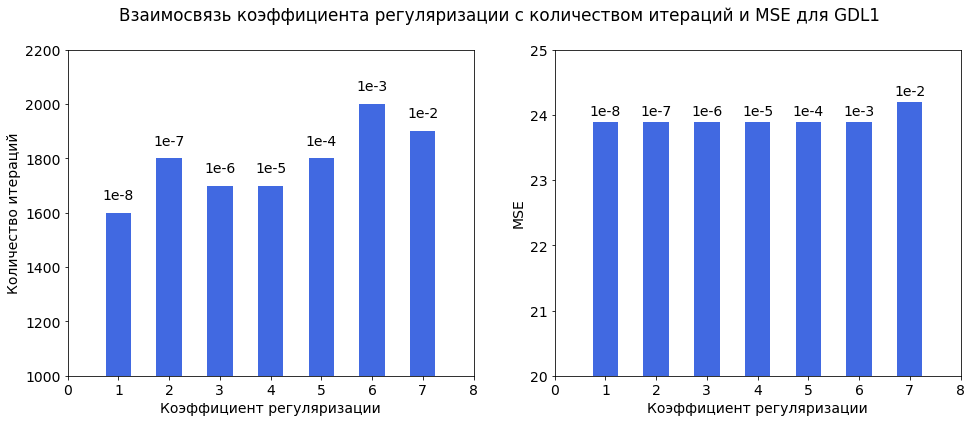

In [1907]:
fig, ax = plt.subplots(ncols = 2, figsize=(16,6))
axis_name(0, 'x', 'Коэффициент регуляризации')

#Коэффициент регуляризации - количество итераций
draw_bar(0, 0, 0, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3], [7, 1e-2]], 'iter', 'lambda_', 'GDL1',
         'royalblue', 0.5, 'max')
set_title(0, 0, 0, [[1, 1650, '1e-8'], [2, 1850, '1e-7'], [3, 1750, '1e-6'], [4, 1750, '1e-5'], [5, 1850, '1e-4'], 
                 [6, 2050, '1e-3'], [7, 1950, '1e-2']], 'center')
ax[0].set_xlim([0, 8])
ax[0].set_ylim(1000, 2200)
ax[0].set_ylabel('Количество итераций')

#Коэффициент регуляризации - MSE
draw_bar(0, 1, 0, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3], [7, 1e-2]], 'MSE', 'lambda_', 'GDL1', 
         'royalblue', 0.5, 'min')
set_title(0, 1, 0, [[1, 24, '1e-8'], [2, 24, '1e-7'], [3, 24, '1e-6'], [4, 24, '1e-5'], [5, 24, '1e-4'], 
                 [6, 24, '1e-3'], [7, 24.3, '1e-2']], 'center')
ax[1].set_ylabel('MSE')
ax[1].set_xlim([0, 8])
ax[1].set_ylim(20, 25)

fig.suptitle('Взаимосвязь коэффициента регуляризации с количеством итераций и MSE для GDL1')

С ростом коэффициента регуляризации растет количество итераций. Связь с MSE Не очевидна. Вроде начиная с определенного момента - с ростом коэффициента регуляризации начинает расти MSE.

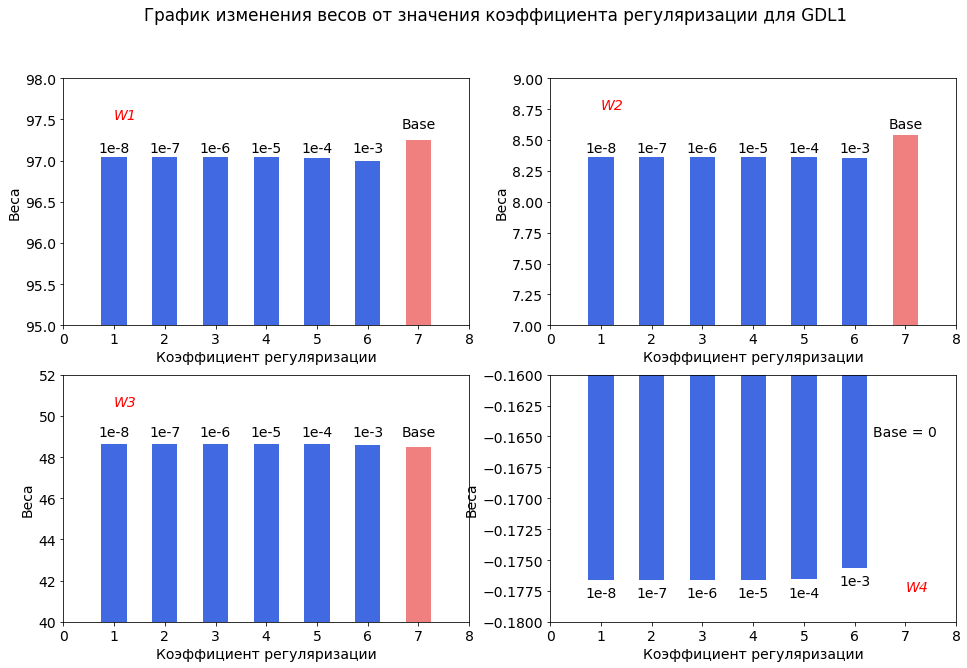

In [1908]:
fig , ax = plt.subplots(nrows = 2, ncols = 2, figsize=(16,10))
axis_name(2, 'x', 'Коэффициент регуляризации')
axis_name(2, 'y', 'Веса')

#w1 - коэффициент регуляризации
draw_bar(0, 0, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w1', 'lambda_', 'GDL1', 'royalblue',
         0.5, 'max')
set_title(0, 0, 2, [[1, 97.1, '1e-8'], [2, 97.1, '1e-7'], [3, 97.1, '1e-6'], [4, 97.1, '1e-5'], [5, 97.1, '1e-4'], 
           [6, 97.1, '1e-3'], [7, 97.4, 'Base']], 'center')
ax[0][0].bar(7, df['w1'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[0][0].set_ylim([95, 98])
ax[0][0].set_xlim([0, 8])
ax[0][0].text(1, 97.5, 'W1', horizontalalignment = 'left', style = 'italic', color = 'red')

#w2 - коэффициент регуляризации
draw_bar(0, 1, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w2', 'lambda_', 'GDL1', 'royalblue',
         0.5, 'max')
set_title(0, 1, 2, [[1, 8.4, '1e-8'], [2, 8.4, '1e-7'], [3, 8.4, '1e-6'], [4, 8.4, '1e-5'], [5, 8.4, '1e-4'], 
           [6, 8.4, '1e-3'], [7, 8.6, 'Base']], 'center')
ax[0][1].bar(7, df['w2'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[0][1].set_ylim([7, 9])
ax[0][1].set_xlim([0, 8])
ax[0][1].text(1, 8.75, 'W2', horizontalalignment = 'left', style = 'italic', color = 'red')

#w3 - коэффициент регуляризации
draw_bar(1, 0, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w3', 'lambda_', 'GDL1', 'royalblue',
         0.5, 'max')
set_title(1, 0, 2, [[1, 49, '1e-8'], [2, 49, '1e-7'], [3, 49, '1e-6'], [4, 49, '1e-5'], [5, 49, '1e-4'], 
           [6, 49, '1e-3'], [7, 49, 'Base']], 'center')
ax[1][0].bar(7, df['w3'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[1][0].set_ylim([40, 52])
ax[1][0].set_xlim([0, 8])
ax[1][0].text(1, 50.5, 'W3', horizontalalignment = 'left', style = 'italic', color = 'red')

#w4 - коэффициент регуляризации
draw_bar(1, 1, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w4', 'lambda_', 'GDL1', 'royalblue',
         0.5, 'min')
set_title(1, 1, 2, [[1, -0.178, '1e-8'], [2, -0.178, '1e-7'], [3, -0.178, '1e-6'], [4, -0.178, '1e-5'], 
                    [5, -0.178, '1e-4'], [6, -0.177, '1e-3'], [7, -0.165, 'Base = 0']], 'center')
ax[1][1].bar(7, df['w4'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[1][1].set_ylim([-0.18, -0.16])
ax[1][1].set_xlim([0, 8])
ax[1][1].text(7, -0.1775, 'W4', horizontalalignment = 'left', style = 'italic', color = 'red')

fig.suptitle('График изменения весов от значения коэффициента регуляризации для GDL1')
plt.show()

Я не вижу какой-либо взаимосвязи. Кроме того, что вроде бы растет w4. Наверное, я неправильно модифицировала формулу.

### Стохастический градиентный спуск с использованием L1 регуляризации (Lasso)

In [1909]:
# mini-batch GD & SGD
def eval_SGD_L1(X, y, iterations, qty_in_batch=1, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp) + lambda_ * np.abs(w))
        if i % 100 == 0:
            print(i, w, err)
            w1, w2, w3, w4 = w
            name = 'SGDL1'
            df.loc[len(df)] = [name, iterations, alpha, lambda_, i, w1, w2, w3, w4, err]
    return w, df

In [1910]:
eval_SGD_L1(X, y, 400, qty_in_batch=1, alpha=1e-2, lambda_=1e-8)

100 [83.57964397  6.52862625 40.1459323   0.6317211 ] 16.998326312743615
200 [9.51317245e+01 8.02500647e+00 4.71756336e+01 1.32257643e-03] 0.20392728124326687
300 [96.76343465  8.3043247  48.38950544 -0.14528248] 0.03017415677561663
400 [96.99731758  8.3521965  48.59505214 -0.17242834] 0.029721235058425863


(array([96.99731758,  8.3521965 , 48.59505214, -0.17242834]),
       name iterations      alpha    lambda_  \
 0     Base          0          0          0   
 1       GD       1300 0.01000000          0   
 2       GD       1300 0.01000000          0   
 3       GD       1300 0.01000000          0   
 4       GD       1300 0.01000000          0   
 ..     ...        ...        ...        ...   
 415   GDL1       1900 0.01000000 0.01000000   
 416  SGDL1        400 0.01000000 0.00000001   
 417  SGDL1        400 0.01000000 0.00000001   
 418  SGDL1        400 0.01000000 0.00000001   
 419  SGDL1        400 0.01000000 0.00000001   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              

In [1911]:
eval_SGD_L1(X, y, 400, qty_in_batch=1, alpha=1e-2, lambda_=1e-7)

100 [83.5770448   6.52839689 40.14461053  0.63171476] 17.006504622119984
200 [9.51277235e+01 8.02459319e+00 4.71734457e+01 1.38770559e-03] 0.20520421156550223
300 [96.75908888  8.30385216 48.38705878 -0.14519566] 0.030682220303348988
400 [96.99290154  8.35170956 48.59254306 -0.17233877] 0.03022311397090803


(array([96.99290154,  8.35170956, 48.59254306, -0.17233877]),
       name iterations      alpha    lambda_  \
 0     Base          0          0          0   
 1       GD       1300 0.01000000          0   
 2       GD       1300 0.01000000          0   
 3       GD       1300 0.01000000          0   
 4       GD       1300 0.01000000          0   
 ..     ...        ...        ...        ...   
 419  SGDL1        400 0.01000000 0.00000001   
 420  SGDL1        400 0.01000000 0.00000010   
 421  SGDL1        400 0.01000000 0.00000010   
 422  SGDL1        400 0.01000000 0.00000010   
 423  SGDL1        400 0.01000000 0.00000010   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              

In [1912]:
eval_SGD_L1(X, y, 400, qty_in_batch=1, alpha=1e-2, lambda_=1e-6)

100 [83.55106014  6.52610389 40.13139653  0.63165135] 17.08837518898934
200 [9.50877306e+01 8.02046240e+00 4.71515760e+01 2.03855025e-03] 0.218187816980342
300 [96.715652    8.29912941 48.36260506 -0.14432755] 0.035994256876029494
400 [96.94876305  8.34684296 48.56746625 -0.1714431 ] 0.035471231532565727


(array([96.94876305,  8.34684296, 48.56746625, -0.1714431 ]),
       name iterations      alpha    lambda_  \
 0     Base          0          0          0   
 1       GD       1300 0.01000000          0   
 2       GD       1300 0.01000000          0   
 3       GD       1300 0.01000000          0   
 4       GD       1300 0.01000000          0   
 ..     ...        ...        ...        ...   
 423  SGDL1        400 0.01000000 0.00000010   
 424  SGDL1        400 0.01000000 0.00000100   
 425  SGDL1        400 0.01000000 0.00000100   
 426  SGDL1        400 0.01000000 0.00000100   
 427  SGDL1        400 0.01000000 0.00000100   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              

In [1913]:
eval_SGD_L1(X, y, 400, qty_in_batch=1, alpha=1e-2, lambda_=1e-5)

100 [83.29191518  6.50323967 39.99962602  0.63101919] 17.915777507950178
200 [9.46894686e+01 7.97934873e+00 4.69338548e+01 8.50250946e-03] 0.3692923587114076
300 [96.28335208  8.2521654  48.11934884 -0.13565428] 0.11209491990591486
400 [96.50956212  8.2984641  48.3180831  -0.1624889 ] 0.11073431720325266


(array([96.50956212,  8.2984641 , 48.3180831 , -0.1624889 ]),
       name iterations      alpha    lambda_  \
 0     Base          0          0          0   
 1       GD       1300 0.01000000          0   
 2       GD       1300 0.01000000          0   
 3       GD       1300 0.01000000          0   
 4       GD       1300 0.01000000          0   
 ..     ...        ...        ...        ...   
 427  SGDL1        400 0.01000000 0.00000100   
 428  SGDL1        400 0.01000000 0.00001000   
 429  SGDL1        400 0.01000000 0.00001000   
 430  SGDL1        400 0.01000000 0.00001000   
 431  SGDL1        400 0.01000000 0.00001000   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              

In [1914]:
eval_SGD_L1(X, y, 400, qty_in_batch=1, alpha=1e-2, lambda_=1e-4)

100 [80.76910747  6.28102488 38.7180482   0.62487469] 27.01053623534872
200 [9.08676006e+01 7.58688281e+00 4.48505250e+01 6.88899947e-02] 3.85362708323818
300 [ 9.21581941e+01  7.80759632e+00  4.58088498e+01 -5.00075785e-02] 3.017687764824399
400 [ 9.23256765e+01  7.84185773e+00  4.59556298e+01 -7.30850599e-02] 2.9977558059523104


(array([ 9.23256765e+01,  7.84185773e+00,  4.59556298e+01, -7.30850599e-02]),
       name iterations      alpha    lambda_  \
 0     Base          0          0          0   
 1       GD       1300 0.01000000          0   
 2       GD       1300 0.01000000          0   
 3       GD       1300 0.01000000          0   
 4       GD       1300 0.01000000          0   
 ..     ...        ...        ...        ...   
 431  SGDL1        400 0.01000000 0.00001000   
 432  SGDL1        400 0.01000000 0.00010000   
 433  SGDL1        400 0.01000000 0.00010000   
 434  SGDL1        400 0.01000000 0.00010000   
 435  SGDL1        400 0.01000000 0.00010000   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                              

In [1915]:
eval_SGD_L1(X, y, 400, qty_in_batch=1, alpha=1e-2, lambda_=1e-3)

100 [61.12208889  4.57786403 28.82558952  0.5749503 ] 164.55059649103956
200 [64.22110735  4.97323757 30.67504477  0.38998625] 138.52234943042484
300 [64.38202919  5.00055392 30.79271692  0.37467447] 137.77995984159034
400 [64.39050871  5.00228193 30.80005506  0.37364396] 137.77328950649058


(array([64.39050871,  5.00228193, 30.80005506,  0.37364396]),
       name iterations      alpha    lambda_  \
 0     Base          0          0          0   
 1       GD       1300 0.01000000          0   
 2       GD       1300 0.01000000          0   
 3       GD       1300 0.01000000          0   
 4       GD       1300 0.01000000          0   
 ..     ...        ...        ...        ...   
 435  SGDL1        400 0.01000000 0.00010000   
 436  SGDL1        400 0.01000000 0.00100000   
 437  SGDL1        400 0.01000000 0.00100000   
 438  SGDL1        400 0.01000000 0.00100000   
 439  SGDL1        400 0.01000000 0.00100000   
 
                                               iter          w1         w2  \
 0    AxesSubplot(0.547727,0.125;0.352273x0.343182) 97.24613900 8.54030302   
 1                                              100 83.84068931 6.55300704   
 2                                              200 95.20501662 8.03612475   
 3                                              

<table>
<tr><th>Модель</th><th>Число итераций</th><th>Alpha</th><th>Lambda</th><th>MSE</th><th>Вес 1</th><th>Вес 2</th><th>Вес 3</th><th>Вес 4</th></tr>
    
<tr><td>Исходные данные</td><td>-</td><td>-</td><td>-</td><td>-</td><td>97.246139</td><td>8.54030302</td><td>48.50179875</td><td>0.</td></tr>
    
<tr><td>SGD (1e-2)</td><td>400</td><td>1e-2</td><td>-</td><td>0.029665728288381207</td><td>96.99780828</td><td>8.35225061</td><td>48.59533094</td><td>-0.1724383</td></tr>

<tr><td>SGDL2 (1e-2)</td><td>400</td><td>1e-2</td><td>1e-7</td><td>0.030798672418639293</td><td>96.98799444</td><td>8.3511684</td><td>48.58975605</td><td>-0.17220843</td></tr>
    
<tr><td>SGDL1 (1e-2)</td><td>400</td><td>1e-2</td><td>1e-8</td><td>0.029721235058425863</td><td>96.99731758</td><td>8.3521965</td><td>48.6336778</td><td>-0.17242834</td></tr>
    
<tr><td>SGDL1 (1e-2)</td><td>400</td><td>1e-2</td><td>1e-7</td><td>0.03022311397090803</td><td>96.99290154</td><td>8.35170956</td><td>48.59254306</td><td>-0.17233877</td></tr>
    
<tr><td>SGDL1 (1e-2)</td><td>400</td><td>1e-2</td><td>1e-6</td><td>0.035471231532565727</td><td>96.94876305</td><td>8.34684296</td><td>48.56746625</td><td>-0.1714431</td></tr>
   
<tr><td>SGDL1 (1e-2)</td><td>400</td><td>1e-2</td><td>1e-5</td><td>0.11073431720325266</td><td>96.50956212</td><td>8.2984641</td><td>48.3180831</td><td>-0.1624889</td></tr>

<tr><td>SGDL1 (1e-2)</td><td>400</td><td>1e-2</td><td>1e-4</td><td>2.9977558059523104</td><td>9.23256765e+01</td><td>7.84185773e+00</td><td>4.59556298e+01</td><td>-7.30850599e-02</td></tr>
    
<tr><td>SGDL1 (1e-2)</td><td>400</td><td>1e-2</td><td>1e-3</td><td>137.77328950649058</td><td>64.39050871</td><td>5.00228193</td><td>30.80005506</td><td>0.37364396</td></tr>
   
</table>

Text(0.5, 0.98, 'Взаимосвязь коэффициента регуляризации с количеством итераций и MSE для SGDL1')

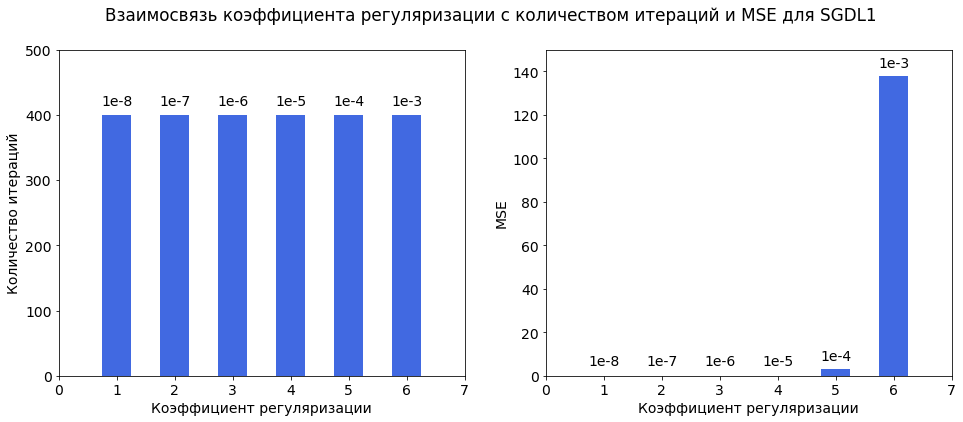

In [1916]:
fig, ax = plt.subplots(ncols = 2, figsize=(16,6))
axis_name(0, 'x', 'Коэффициент регуляризации')

#Коэффициент регуляризации - количество итераций
draw_bar(0, 0, 0, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'iter', 'lambda_', 'SGDL1',
         'royalblue', 0.5, 'max')
set_title(0, 0, 0, [[1, 415, '1e-8'], [2, 415, '1e-7'], [3, 415, '1e-6'], [4, 415, '1e-5'], [5, 415, '1e-4'], 
                 [6, 415, '1e-3']], 'center')
ax[0].set_xlim([0, 7])
ax[0].set_ylim(0, 500)
ax[0].set_ylabel('Количество итераций')

#Коэффициент регуляризации - MSE
draw_bar(0, 1, 0, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'MSE', 'lambda_', 'SGDL1', 
         'royalblue', 0.5, 'min')
set_title(0, 1, 0, [[1, 5, '1e-8'], [2, 5, '1e-7'], [3, 5, '1e-6'], [4, 5, '1e-5'], [5, 7, '1e-4'], 
                 [6, 142, '1e-3']], 'center')
ax[1].set_ylabel('MSE')
ax[1].set_xlim([0, 7])
ax[1].set_ylim(0, 150)

fig.suptitle('Взаимосвязь коэффициента регуляризации с количеством итераций и MSE для SGDL1')

Связи величины коэффициента регуляризации и количества итераций - нет. С ростом коэффициента регуляризации растет MSE.

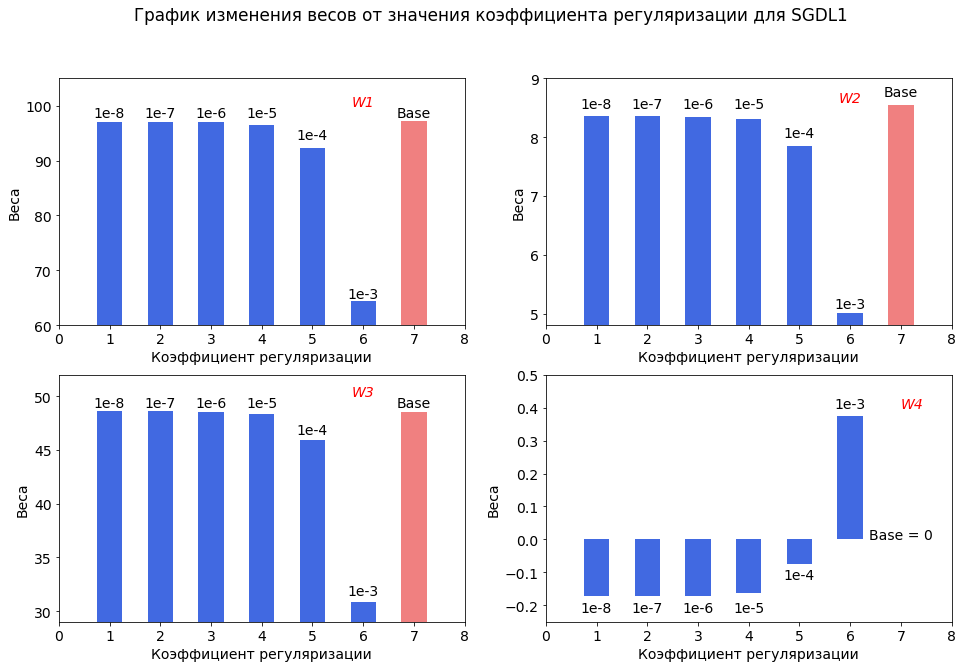

In [1917]:
fig , ax = plt.subplots(nrows = 2, ncols = 2, figsize=(16,10))
axis_name(2, 'x', 'Коэффициент регуляризации')
axis_name(2, 'y', 'Веса')

#w1 - коэффициент регуляризации
draw_bar(0, 0, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w1', 'lambda_', 'SGDL1', 'royalblue',
         0.5, 'max')
set_title(0, 0, 2, [[1, 98, '1e-8'], [2, 98, '1e-7'], [3, 98, '1e-6'], [4, 98, '1e-5'], [5, 94, '1e-4'], 
           [6, 65, '1e-3'], [7, 98, 'Base']], 'center')
ax[0][0].bar(7, df['w1'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[0][0].set_ylim([60, 105])
ax[0][0].set_xlim([0, 8])
ax[0][0].text(6, 100, 'W1', horizontalalignment = 'center', style = 'italic', color = 'red')

#w2 - коэффициент регуляризации
draw_bar(0, 1, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w2', 'lambda_', 'SGDL1', 'royalblue',
         0.5, 'max')
set_title(0, 1, 2, [[1, 8.5, '1e-8'], [2, 8.5, '1e-7'], [3, 8.5, '1e-6'], [4, 8.5, '1e-5'], [5, 8, '1e-4'], 
           [6, 5.1, '1e-3'], [7, 8.7, 'Base']], 'center')
ax[0][1].bar(7, df['w2'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[0][1].set_ylim([4.8, 9])
ax[0][1].set_xlim([0, 8])
ax[0][1].text(6, 8.6, 'W2', horizontalalignment = 'center', style = 'italic', color = 'red')

#w3 - коэффициент регуляризации
draw_bar(1, 0, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w3', 'lambda_', 'SGDL1', 'royalblue',
         0.5, 'max')
set_title(1, 0, 2, [[1, 49, '1e-8'], [2, 49, '1e-7'], [3, 49, '1e-6'], [4, 49, '1e-5'], [5, 46.5, '1e-4'], 
           [6, 31.5, '1e-3'], [7, 49, 'Base']], 'center')
ax[1][0].bar(7, df['w3'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[1][0].set_ylim([29, 52])
ax[1][0].set_xlim([0, 8])
ax[1][0].text(6, 50, 'W3', horizontalalignment = 'center', style = 'italic', color = 'red')

#w4 - коэффициент регуляризации
draw_bar(1, 1, 2, [[1, 1e-8], [2, 1e-7], [3, 1e-6], [4, 1e-5], [5, 1e-4], [6, 1e-3]], 'w4', 'lambda_', 'SGDL1', 'royalblue',
         0.5, 'min')
set_title(1, 1, 2, [[1, -0.22, '1e-8'], [2, -0.22, '1e-7'], [3, -0.22, '1e-6'], [4, -0.22, '1e-5'], 
                    [5, -0.12, '1e-4'], [6, 0.4, '1e-3'], [7, 0, 'Base = 0']], 'center')
ax[1][1].bar(7, df['w4'].loc[df['name']=='Base'].item(), color = 'lightcoral', width = 0.5)
ax[1][1].set_ylim([-0.25, 0.5])
ax[1][1].set_xlim([0, 8])
ax[1][1].text(7, 0.4, 'W4', horizontalalignment = 'left', style = 'italic', color = 'red')

fig.suptitle('График изменения весов от значения коэффициента регуляризации для SGDL1')
plt.show()

### Задача 4

Построить график изменения весов от числа итераций при GD и SGD (на одном рисунке).

<font color='red'><b> Я не стала строить все на одной диаграмме - так как размерность весов разная, а их отличия между алгоритмами столь минимальны, что при построении на одной диаграмме - просто ничего не видно.

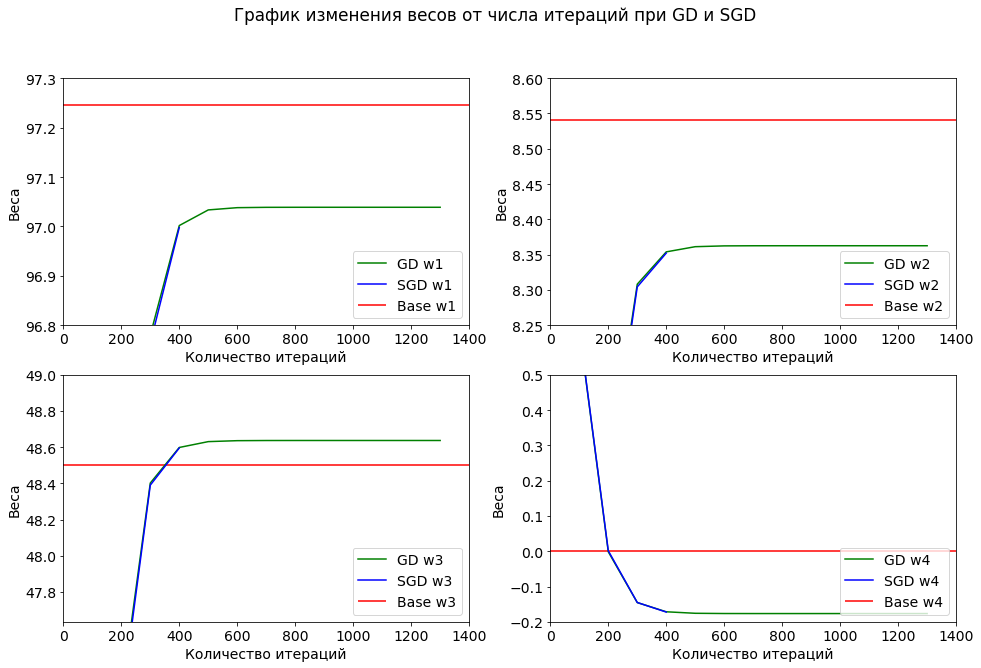

In [1918]:
fig , ax = plt.subplots(nrows = 2, ncols = 2, figsize=(16,10))
axis_name(2, 'x', 'Количество итераций')
axis_name(2, 'y', 'Веса')
 
ax[0][0].plot(df['iter'].loc[(df['name'] == 'GD') & (df['alpha'] == 1e-2)],
              df['w1'].loc[(df['name'] == 'GD') & (df['alpha'] == 1e-2)], color = 'green') 
ax[0][0].plot(df['iter'].loc[(df['name'] == 'SGD') & (df['alpha'] == 1e-2)],
              df['w1'].loc[(df['name'] == 'SGD') & (df['alpha'] == 1e-2)], color = 'blue') 
ax[0][0].set_ylim([96.8, 97.3])
ax[0][0].set_xlim([0, 1400])
ax[0][0].hlines(97.246139, 0, 1400, color = 'red')
ax[0][0].legend(['GD w1', 'SGD w1', 'Base w1'], loc=4)

ax[0][1].plot(df['iter'].loc[(df['name'] == 'GD') & (df['alpha'] == 1e-2)],
              df['w2'].loc[(df['name'] == 'GD') & (df['alpha'] == 1e-2)], color = 'green') 
ax[0][1].plot(df['iter'].loc[(df['name'] == 'SGD') & (df['alpha'] == 1e-2)],
              df['w2'].loc[(df['name'] == 'SGD') & (df['alpha'] == 1e-2)], color = 'blue') 
ax[0][1].set_ylim([8.25, 8.6])
ax[0][1].set_xlim([0, 1400])
ax[0][1].hlines(8.54030302, 0, 1400, color = 'red')
ax[0][1].legend(['GD w2', 'SGD w2', 'Base w2'], loc=4)

ax[1][0].plot(df['iter'].loc[(df['name'] == 'GD') & (df['alpha'] == 1e-2)],
              df['w3'].loc[(df['name'] == 'GD') & (df['alpha'] == 1e-2)], color = 'green') 
ax[1][0].plot(df['iter'].loc[(df['name'] == 'SGD') & (df['alpha'] == 1e-2)],
              df['w3'].loc[(df['name'] == 'SGD') & (df['alpha'] == 1e-2)], color = 'blue') 
ax[1][0].set_ylim([47.635, 49])
ax[1][0].set_xlim([0, 1400])
ax[1][0].hlines(48.50179875, 0, 1400, color = 'red')
ax[1][0].legend(['GD w3', 'SGD w3', 'Base w3'], loc=4)

ax[1][1].plot(df['iter'].loc[(df['name'] == 'GD') & (df['alpha'] == 1e-2)],
              df['w4'].loc[(df['name'] == 'GD') & (df['alpha'] == 1e-2)], color = 'green') 
ax[1][1].plot(df['iter'].loc[(df['name'] == 'SGD') & (df['alpha'] == 1e-2)],
              df['w4'].loc[(df['name'] == 'SGD') & (df['alpha'] == 1e-2)], color = 'blue') 
ax[1][1].set_ylim([-0.2, 0.5])
ax[1][1].set_xlim([0, 1400])
ax[1][1].hlines(0, 0, 1400, color = 'red')
ax[1][1].legend(['GD w4', 'SGD w4', 'Base w4'], loc=4)

fig.suptitle('График изменения весов от числа итераций при GD и SGD')
plt.show()

### Задача 5

Построить график изменения весов для L1 и L2 регуляризации от коэффициента регуляризации.

<i>Если я правильно поняла задачу - то такие графики, для каждого из алгоритмов, я нарисовала ранее.